In [3]:
# Imports
import os

import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

In [4]:
# Set root Dir for the project.
ROOT_DIR = "/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/"
RESULTS_DIR = ROOT_DIR + "Priors/"

# Dataset folder
PING_DATA = "/Volumes/T7/PING/TabularData/"
BCP_DATA = ROOT_DIR + "/BCP/"
BANDA_DATA = "/Volumes/T7/CCPM/BANDA/BANDARelease1.1/"
GESTE_DATA = "/Volumes/T7/CCPM/GESTE/"
ABCD_DATA = "/Volumes/T7/CCPM/ABCD/Release_5.1/abcd-data-release-5.1/"
MYRNA_DATA = "/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/"

# Create a directory for the results if it doesn't exist
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

In [5]:
# Fetch Harding font.
font_files = []
for fontpath in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "Harding".lower() in fontpath.lower():
        font_files.append(fontpath)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Set Harding font.
plt.rcParams['font.family'] = 'Harding Text Web'

# Set the Set2 color palette as an iterable.
cmap = sns.color_palette("Set2", 8)

In [8]:
# Load up all priors dataframe.
abcd_df = pd.read_csv(RESULTS_DIR + "ABCD_priors.csv")
banda_df = pd.read_csv(RESULTS_DIR + "BANDA_priors.csv")
bcp_df = pd.read_csv(RESULTS_DIR + "BCP_priors.csv")
geste_df = pd.read_csv(RESULTS_DIR + "GESTE_priors.csv")
myrna_df = pd.read_csv(RESULTS_DIR + "MYRNA_priors.csv")
ping_df = pd.read_csv(RESULTS_DIR + "PING_priors.csv")

# Load up their demographics data.
abcd_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/ABCD_demographics.csv")
banda_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/BANDA_demographics.csv")
bcp_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/BCP_demographics.csv")
geste_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/GESTE_demographics.csv")
myrna_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/MYRNA_demographics.csv")
ping_demo = pd.read_csv(ROOT_DIR + "StudyPopulation/PING_demographics.csv")

# Load up BCP demographics data.
#bcp_demo = pd.read_csv(ROOT_DIR + "/BCP/ndar_subject01.txt", sep="\t")
#bcp_demo.drop(0, axis=0, inplace=True)

# Keep only relevant columns.
#bcp_demo = bcp_demo[["src_subject_id", "sex", "interview_age"]]
#bcp_demo.loc[:, "session_id"] = bcp_demo["interview_age"].apply(lambda x: f"ses-{int(x)}mo")
#bcp_demo = bcp_demo.rename(columns={"src_subject_id": "subject_id", "interview_age": "age"})
#bcp_demo.loc[:, "age"] = bcp_demo["age"].astype(float) / 12  # Convert age to years.
#bcp_demo.loc[:, "subject_id"] = "sub-" + bcp_demo["subject_id"].astype(str)
#bcp_demo = bcp_demo[["subject_id", "session_id", "sex", "age"]]
#bcp_demo.drop_duplicates(inplace=True)

# For rows where age is not available, get it from the session id.
#bcp_demo.loc[bcp_demo['age'].isnull(), 'age'] = bcp_demo['session_id'].str.extract('(\d+)').astype(int) / 12

# Individually append sex and age to the priors df.
abcd_df = abcd_df.merge(abcd_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
banda_df = banda_df.merge(banda_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
bcp_df = bcp_df.merge(bcp_demo[['subject_id', 'session_id', 'sex', 'age', 'cohort']], on=['subject_id', 'session_id'], how='left')
bcp_df.dropna(subset=['sex', 'age'], inplace=True)
geste_df = geste_df.merge(geste_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
myrna_df = myrna_df.merge(myrna_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
myrna_df.dropna(subset=['sex', 'age'], inplace=True)
ping_df = ping_df.merge(ping_demo[['subject_id', 'sex', 'age', 'cohort']], on='subject_id', how='left')
# Drop participants with age = 0 in PING.
ping_df = ping_df[ping_df['age'] > 0]


In [9]:
# Stacked all priors dataframes.
all_priors = pd.concat([abcd_df, banda_df, bcp_df, geste_df, myrna_df, ping_df], ignore_index=True)

# Save the combined dataframe.
all_priors.to_csv(RESULTS_DIR + "All_priors.csv", index=False)

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/397201583.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", hue="sex", ax=ax[0, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/397201583.py:11: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", hue="sex", ax=ax[0, 1], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/397201583.py:18: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="sex", ax=ax[1, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/397201583.py:25: UserWarning: The palette list has more values (8) than nee

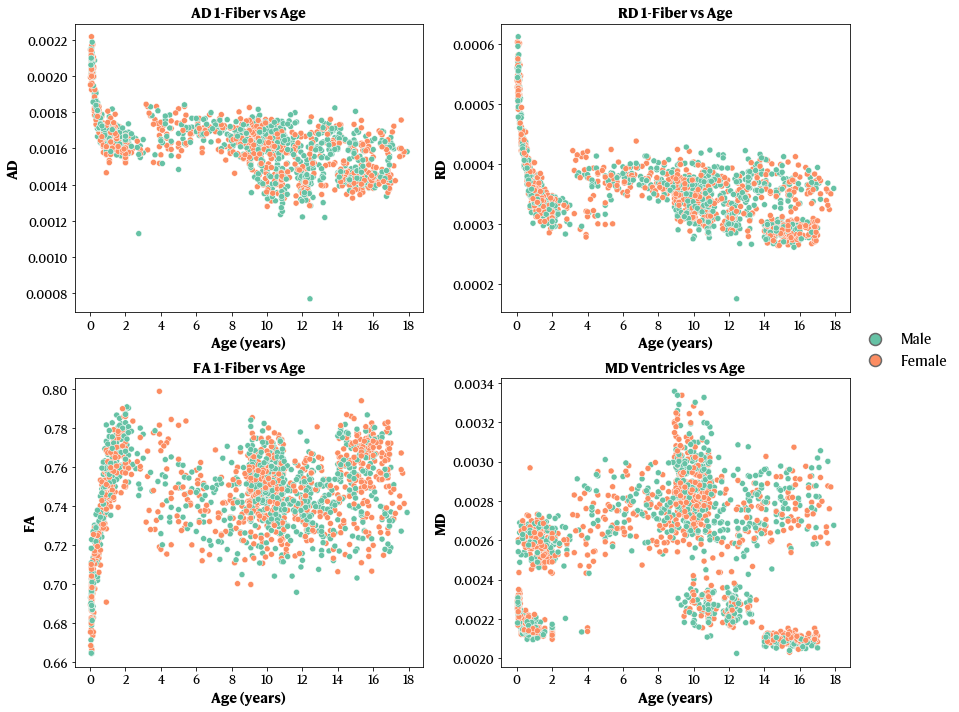

In [6]:
# Generate 4 subplots, one for ad_1fiber, rd_1fiber, fa_1fiber, and md_ventricles against age with sex as a hue.
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", hue="sex", ax=ax[0, 0], palette=cmap, legend=False)
ax[0, 0].set_title("AD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 0].set_ylabel("AD", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", hue="sex", ax=ax[0, 1], palette=cmap, legend=False)
ax[0, 1].set_title("RD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 1].set_ylabel("RD", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 1].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="sex", ax=ax[1, 0], palette=cmap, legend=False)
ax[1, 0].set_title("FA 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel("FA", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="md_ventricle", hue="sex", ax=ax[1, 1], palette=cmap, legend=False)
ax[1, 1].set_title("MD Ventricles vs Age", fontsize=14, fontweight='bold')
ax[1, 1].set_ylabel("MD", fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 1].tick_params(axis='both', which='major', labelsize=12)

handles = [plt.Line2D([0], [0], color=cmap[0], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[1], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey')]
labels = ["Male", "Female"]
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(1.05, 0.55),
           ncol=1, fontsize=14, frameon=False)


plt.tight_layout()
plt.show()

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1938488009.py:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", hue="cohort", ax=ax[0, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1938488009.py:11: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", hue="cohort", ax=ax[0, 1], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1938488009.py:18: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="cohort", ax=ax[1, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1938488009.py:25: UserWarning: The palette list has more values

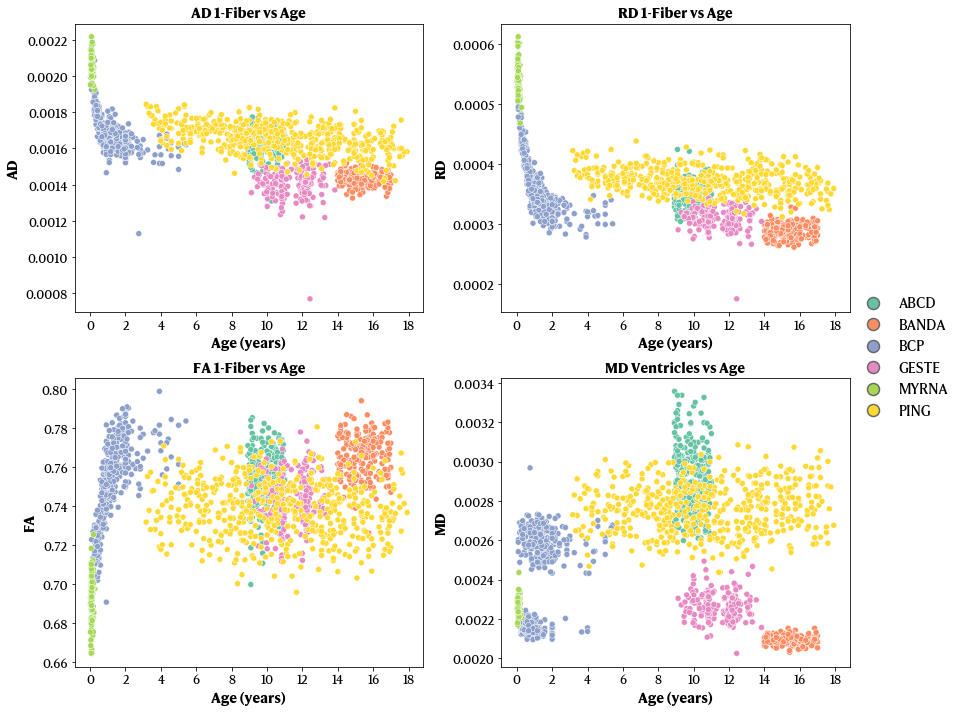

In [7]:
# Same plots, but with cohort as hue.
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", hue="cohort", ax=ax[0, 0], palette=cmap, legend=False)
ax[0, 0].set_title("AD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 0].set_ylabel("AD", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", hue="cohort", ax=ax[0, 1], palette=cmap, legend=False)
ax[0, 1].set_title("RD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 1].set_ylabel("RD", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 1].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="cohort", ax=ax[1, 0], palette=cmap, legend=False)
ax[1, 0].set_title("FA 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel("FA", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="md_ventricle", hue="cohort", ax=ax[1, 1], palette=cmap, legend=False)
ax[1, 1].set_title("MD Ventricles vs Age", fontsize=14, fontweight='bold')
ax[1, 1].set_ylabel("MD", fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Do a single legend for all plots
# Add a global legend highlighting the colors for the diagnoses with a border.
handles = [plt.Line2D([0], [0], color=cmap[0], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[1], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[2], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[3], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[4], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[5], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey')]
labels = ["ABCD", "BANDA", "BCP", "GESTE", "MYRNA", "PING"]
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(1.05, 0.6),
           ncol=1, fontsize=14, frameon=False)

plt.tight_layout()
plt.show()

In [16]:
# Run the GAMLSS model fitting and plotting script with command line arguments using subprocess.
# ** This is a long running process, go get a coffee. **
import subprocess

# Make sure Rscript is installed and available in your PATH.
# You can check this by running `which Rscript` in your terminal.

# Run in silent mode.
subprocess.run(["Rscript", "gamlss.R", "--input", RESULTS_DIR + "All_priors.csv", "--metric", "fa_1fiber", "--output", RESULTS_DIR])
subprocess.run(["Rscript", "gamlss.R", "--input", RESULTS_DIR + "All_priors.csv", "--metric", "ad_1fiber", "--output", RESULTS_DIR])
subprocess.run(["Rscript", "gamlss.R", "--input", RESULTS_DIR + "All_priors.csv", "--metric", "rd_1fiber", "--output", RESULTS_DIR])
subprocess.run(["Rscript", "gamlss.R", "--input", RESULTS_DIR + "All_priors.csv", "--metric", "md_ventricle", "--output", RESULTS_DIR])

Loading required package: splines
Loading required package: gamlss.data

Attaching package: ‘gamlss.data’

The following object is masked from ‘package:datasets’:

    sleep

Loading required package: gamlss.dist
Loading required package: nlme
Loading required package: parallel
 **********   GAMLSS Version 5.5-0  ********** 
For more on GAMLSS look at https://www.gamlss.com/
Type gamlssNews() to see new features/changes/bug fixes.

Input file: /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/All_priors.csv
Metric: fa_1fiber
Output directory: /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/
Loading data...
Fitting GAMLSS model...
Trying polynomial degree 1 for mu and 1 for sigma
Trying polynomial degree 1 for mu and 2 for sigma
Trying polynomial degree 1 for mu and 3 for sigma
Trying polynomial degree 2 for mu and 1 for sigma
Trying polynomial degree 2 for mu and 2 for sigma
Trying polynomial degree 2 for mu and 3 for sigma
Trying

New way of prediction in random()  (starting from GAMLSS version 5.0-6) 
New way of prediction in random()  (starting from GAMLSS version 5.0-6) 


Warning message:
Use of `obs_df[[opt$metric]]` is discouraged.
ℹ Use `.data[[opt$metric]]` instead. 
Warning message:
Use of `obs_df[[opt$metric]]` is discouraged.
ℹ Use `.data[[opt$metric]]` instead. 
Saved results to/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/
Loading required package: splines
Loading required package: gamlss.data

Attaching package: ‘gamlss.data’

The following object is masked from ‘package:datasets’:

    sleep

Loading required package: gamlss.dist
Loading required package: nlme
Loading required package: parallel
 **********   GAMLSS Version 5.5-0  ********** 
For more on GAMLSS look at https://www.gamlss.com/
Type gamlssNews() to see new features/changes/bug fixes.

Input file: /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/All_priors.csv
Metric: ad_1fiber
Output directory: /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/
Loading data...
Fitting GAMLSS model...
Trying pol

New way of prediction in random()  (starting from GAMLSS version 5.0-6) 
New way of prediction in random()  (starting from GAMLSS version 5.0-6) 


Warning message:
Use of `obs_df[[opt$metric]]` is discouraged.
ℹ Use `.data[[opt$metric]]` instead. 
Warning message:
Use of `obs_df[[opt$metric]]` is discouraged.
ℹ Use `.data[[opt$metric]]` instead. 
Saved results to/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/
Loading required package: splines
Loading required package: gamlss.data

Attaching package: ‘gamlss.data’

The following object is masked from ‘package:datasets’:

    sleep

Loading required package: gamlss.dist
Loading required package: nlme
Loading required package: parallel
 **********   GAMLSS Version 5.5-0  ********** 
For more on GAMLSS look at https://www.gamlss.com/
Type gamlssNews() to see new features/changes/bug fixes.

Input file: /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/All_priors.csv
Metric: rd_1fiber
Output directory: /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/
Loading data...
Fitting GAMLSS model...
Trying pol

New way of prediction in random()  (starting from GAMLSS version 5.0-6) 
New way of prediction in random()  (starting from GAMLSS version 5.0-6) 


Warning message:
Use of `obs_df[[opt$metric]]` is discouraged.
ℹ Use `.data[[opt$metric]]` instead. 
Warning message:
Use of `obs_df[[opt$metric]]` is discouraged.
ℹ Use `.data[[opt$metric]]` instead. 
Saved results to/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/
Loading required package: splines
Loading required package: gamlss.data

Attaching package: ‘gamlss.data’

The following object is masked from ‘package:datasets’:

    sleep

Loading required package: gamlss.dist
Loading required package: nlme
Loading required package: parallel
 **********   GAMLSS Version 5.5-0  ********** 
For more on GAMLSS look at https://www.gamlss.com/
Type gamlssNews() to see new features/changes/bug fixes.

Input file: /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/All_priors.csv
Metric: md_ventricle
Output directory: /Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/
Loading data...
Fitting GAMLSS model...
Trying 

New way of prediction in random()  (starting from GAMLSS version 5.0-6) 
New way of prediction in random()  (starting from GAMLSS version 5.0-6) 


Warning message:
Use of `obs_df[[opt$metric]]` is discouraged.
ℹ Use `.data[[opt$metric]]` instead. 
Warning message:
Use of `obs_df[[opt$metric]]` is discouraged.
ℹ Use `.data[[opt$metric]]` instead. 
Saved results to/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/


CompletedProcess(args=['Rscript', 'gamlss.R', '--input', '/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/All_priors.csv', '--metric', 'md_ventricle', '--output', '/Users/anthonygagnon/Documents/École/Université/Projects/nf-pediatric/Priors/'], returncode=0)

In [6]:
# Load back the GAMLSS centile data and plot them with the original data.
fa_centiles = pd.read_csv(RESULTS_DIR + "fa_1fiber_centiles_by_age.csv")
ad_centiles = pd.read_csv(RESULTS_DIR + "ad_1fiber_centiles_by_age.csv")
rd_centiles = pd.read_csv(RESULTS_DIR + "rd_1fiber_centiles_by_age.csv")
md_centiles = pd.read_csv(RESULTS_DIR + "md_ventricle_centiles_by_age.csv")

# For each values in the prob column, create a column prob_value so that the resulting df is in the wide format
# with columns age, P3, P10, P25, P50, P75, P90, P97 (all PX columns contain metric values for the corresponding percentiles).
fa_centiles = fa_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
ad_centiles = ad_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_centiles = rd_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
md_centiles = md_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_centiles.drop(0, axis=0, inplace=True)  # Drop the first row which contains NA values.

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1700407394.py:5: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", hue="cohort", ax=ax[0, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1700407394.py:15: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", hue="cohort", ax=ax[0, 1], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1700407394.py:26: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="cohort", ax=ax[1, 0], palette=cmap, legend=False)
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_19717/1700407394.py:36: UserWarning: The palette list has more values

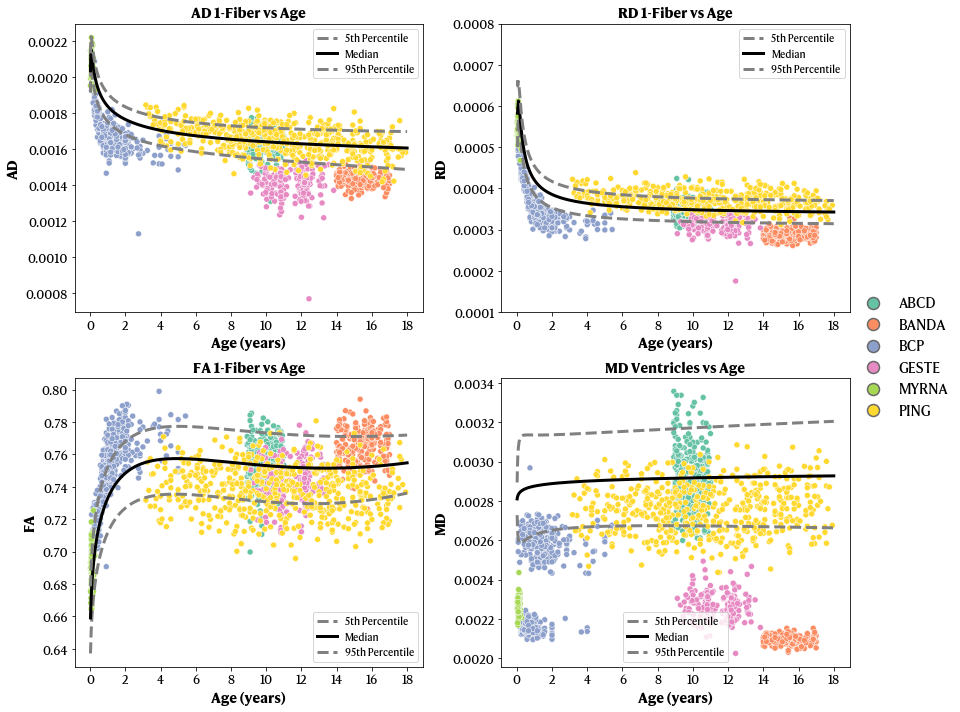

In [9]:
# Plot the centiles on top of the scatterplots.
## Same plots, but with cohort as hue.
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", hue="cohort", ax=ax[0, 0], palette=cmap, legend=False)
sns.lineplot(data=ad_centiles, x="age", y=0.05, ax=ax[0, 0], color='grey', linestyle='--', linewidth=3, label='5th Percentile')
sns.lineplot(data=ad_centiles, x="age", y=0.5, ax=ax[0, 0], color='black', linestyle='-', linewidth=3, label='Median')
sns.lineplot(data=ad_centiles, x="age", y=0.95, ax=ax[0, 0], color='grey', linestyle='--', linewidth=3, label='95th Percentile')
ax[0, 0].set_title("AD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 0].set_ylabel("AD", fontsize=14, fontweight='bold')
ax[0, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", hue="cohort", ax=ax[0, 1], palette=cmap, legend=False)
sns.lineplot(data=rd_centiles, x="age", y=0.05, ax=ax[0, 1], color='grey', linestyle='--', linewidth=3, label='5th Percentile')
sns.lineplot(data=rd_centiles, x="age", y=0.5, ax=ax[0, 1], color='black', linestyle='-', linewidth=3, label='Median')
sns.lineplot(data=rd_centiles, x="age", y=0.95, ax=ax[0, 1], color='grey', linestyle='--', linewidth=3, label='95th Percentile')
ax[0, 1].set_title("RD 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[0, 1].set_ylabel("RD", fontsize=14, fontweight='bold')
ax[0, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[0, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[0, 1].tick_params(axis='both', which='major', labelsize=12)
ax[0, 1].set_ylim(0.0001, 0.0008)

sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", hue="cohort", ax=ax[1, 0], palette=cmap, legend=False)
sns.lineplot(data=fa_centiles, x="age", y=0.05, ax=ax[1, 0], color='grey', linestyle='--', linewidth=3, label='5th Percentile')
sns.lineplot(data=fa_centiles, x="age", y=0.5, ax=ax[1, 0], color='black', linestyle='-', linewidth=3, label='Median')
sns.lineplot(data=fa_centiles, x="age", y=0.95, ax=ax[1, 0], color='grey', linestyle='--', linewidth=3, label='95th Percentile')
ax[1, 0].set_title("FA 1-Fiber vs Age", fontsize=14, fontweight='bold')
ax[1, 0].set_ylabel("FA", fontsize=14, fontweight='bold')
ax[1, 0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 0].tick_params(axis='both', which='major', labelsize=12)

sns.scatterplot(data=all_priors, x="age", y="md_ventricle", hue="cohort", ax=ax[1, 1], palette=cmap, legend=False)
sns.lineplot(data=md_centiles, x="age", y=0.05, ax=ax[1, 1], color='grey', linestyle='--', linewidth=3, label='5th Percentile')
sns.lineplot(data=md_centiles, x="age", y=0.5, ax=ax[1, 1], color='black', linestyle='-', linewidth=3, label='Median')
sns.lineplot(data=md_centiles, x="age", y=0.95, ax=ax[1, 1], color='grey', linestyle='--', linewidth=3, label='95th Percentile')
ax[1, 1].set_title("MD Ventricles vs Age", fontsize=14, fontweight='bold')
ax[1, 1].set_ylabel("MD", fontsize=14, fontweight='bold')
ax[1, 1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax[1, 1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Do a single legend for all plots
# Add a global legend highlighting the colors for the diagnoses with a border.
handles = [plt.Line2D([0], [0], color=cmap[0], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[1], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[2], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[3], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[4], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey'),
           plt.Line2D([0], [0], color=cmap[5], markersize=12, lw=0, marker="o", markeredgewidth=1.5, markeredgecolor='dimgrey')]
labels = ["ABCD", "BANDA", "BCP", "GESTE", "MYRNA", "PING"]
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(1.05, 0.6),
           ncol=1, fontsize=14, frameon=False)

plt.tight_layout()
plt.show()

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_89399/2424547337.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_priors, x="cohort", y="age", palette=cohort_cmap, ax=ax01,
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_89399/2424547337.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=all_priors, x="cohort", y="age", palette=cohort_cmap, ax=ax01,
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_89399/2424547337.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax01.set_xticklabels(["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"], rotation=45, ha=

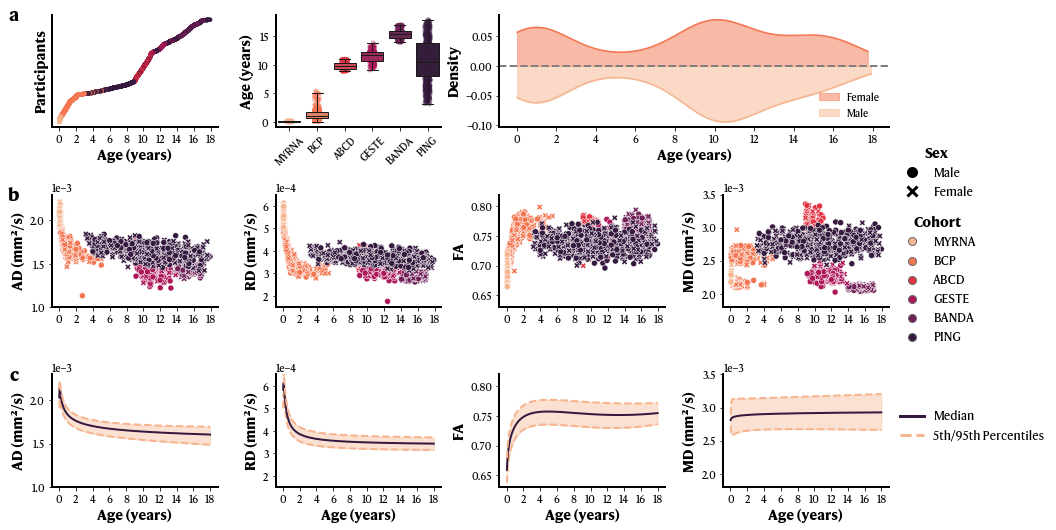

In [10]:
# Create a GridSpec layout: top row has a joint-like scatter (ax00), a boxplot (ax01),
# and a merged density axis spanning the last two columns (ax02). The bottom three rows
# contain the priors plots (sex scatter, cohort scatter, and centile curves) — reused from the
# original implementation.
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde

fig = plt.figure(figsize=(15, 12))
# 4 rows x 4 cols grid; top row will use cols 0,1 and cols 2:4 merged
gs = fig.add_gridspec(nrows=4, ncols=4, height_ratios=[1, 1, 1, 1], hspace=0.6, wspace=0.35)

# Top row axes
ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1])
ax02 = fig.add_subplot(gs[0, 2:4])  # merged density plot spanning two columns

# Bottom three rows: 2 x 4 axes (rows 1..2)
axes = [[fig.add_subplot(gs[r, c]) for c in range(4)] for r in range(1, 3)]

rocket_cmap = sns.color_palette("rocket_r", 6)

# Color maps (reuse existing small palettes)
# sex_cmap = [cmap[2], cmap[3]]  # two colors for sex
cohort_cmap = [rocket_cmap[0], rocket_cmap[1], rocket_cmap[2], rocket_cmap[3], rocket_cmap[4], rocket_cmap[5]]  # six cohorts

# --- Top-left: joint-like scatter (age vs FA) ---
# Use stripplot to create a scatter-like plot with jitter.
all_priors["index"] = all_priors.index.astype(str)
sns.scatterplot(data=all_priors.sort_values(by="age", ascending=False), x="age", y="index", hue="cohort",
                palette=cohort_cmap, ax=ax00, legend=False, alpha=1, edgecolor=None, size=8,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
#ax00.set_title("FA (age vs FA) — scatter by sex", fontsize=14, fontweight='bold')
ax00.set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax00.set_ylabel("Participants", fontsize=14, fontweight='bold')
ax00.set_yticks([])  # Hide y-ticks for clarity
ax00.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax00.tick_params(axis='both', which='major', labelsize=10)
ax00.spines[["top", "right"]].set_visible(False)
ax00.spines[["left", "bottom"]].set_linewidth(2)

# --- Top-second: boxplot of FA by sex ---
sns.boxplot(data=all_priors, x="cohort", y="age", palette=cohort_cmap, ax=ax01,
            order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"], zorder=2, whis=3,
            fliersize=0)
sns.stripplot(data=all_priors, x="cohort", y="age", palette=cohort_cmap, ax=ax01,
              order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"], alpha=0.4, zorder=1)
ax01.set_xlabel("")
ax01.set_ylabel("Age (years)", fontsize=14, fontweight='bold')
ax01.tick_params(axis='both', which='major', labelsize=10)
ax01.set_xticklabels(["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"], rotation=45, ha='center')
ax01.spines[["top", "right"]].set_visible(False)
ax01.spines[["left", "bottom"]].set_linewidth(2)

# --- Top merged density: KDEs of FA per cohort ---
kde_male = gaussian_kde(all_priors[all_priors["sex"] == "M"]["age"], bw_method=0.3)
x_male = np.linspace(all_priors[all_priors["sex"] == "M"]["age"].min(), all_priors[all_priors["sex"] == "M"]["age"].max(), 1000)
y_male = kde_male(x_male)
kde_female = gaussian_kde(all_priors[all_priors["sex"] == "F"]["age"], bw_method=0.3)
x_female = np.linspace(all_priors[all_priors["sex"] == "F"]["age"].min(), all_priors[all_priors["sex"] == "F"]["age"].max(), 1000)
y_female = kde_female(x_female)
ax02.fill_between(x_female, 0, y_female, color=rocket_cmap[1], alpha=0.5, label="Female")
ax02.fill_between(x_male, -y_male, 0, color=rocket_cmap[0], alpha=0.5, label="Male")
sns.lineplot(x=x_female, y=y_female, color=rocket_cmap[1], ax=ax02)
sns.lineplot(x=x_male, y=-y_male, color=rocket_cmap[0], ax=ax02)
ax02.axhline(0, color="grey", linewidth=2, linestyle='--')
ax02.set_xlabel("Age (years)", fontsize=14, fontweight='bold')
ax02.set_ylabel("Density", fontsize=14, fontweight='bold')
ax02.legend(fontsize=10, frameon=False)
ax02.tick_params(axis='both', which='major', labelsize=10)
ax02.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax02.spines[["top", "right"]].set_visible(False)
ax02.spines[["left", "bottom"]].set_linewidth(2)



# Row 2 (index 1 in axes): cohort-labeled scatterplots
sns.scatterplot(data=all_priors, x="age", y="ad_1fiber", ax=axes[0][0], hue="cohort", style="sex", palette=cohort_cmap, legend=False,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
axes[0][0].set_ylim(0.0010, 0.0023)
axes[0][0].set_ylabel("AD (mm²/s)", fontsize=14, fontweight='bold')
axes[0][0].set_xlabel("")
axes[0][0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[0][0].tick_params(axis='both', which='major', labelsize=10)

sns.scatterplot(data=all_priors, x="age", y="rd_1fiber", ax=axes[0][1], hue="cohort", style="sex", palette=cohort_cmap, legend=False,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
axes[0][1].set_ylim(0.00015, 0.00065)
axes[0][1].set_ylabel("RD (mm²/s)", fontsize=14, fontweight='bold')
axes[0][1].set_xlabel("")
axes[0][1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[0][1].tick_params(axis='both', which='major', labelsize=10)

sns.scatterplot(data=all_priors, x="age", y="fa_1fiber", ax=axes[0][2], hue="cohort", style="sex", palette=cohort_cmap, legend=False,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
axes[0][2].set_ylim(0.63, 0.82)
axes[0][2].set_ylabel("FA", fontsize=14, fontweight='bold')
axes[0][2].set_xlabel("")
axes[0][2].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[0][2].tick_params(axis='both', which='major', labelsize=10)

sns.scatterplot(data=all_priors, x="age", y="md_ventricle", ax=axes[0][3], hue="cohort", style="sex", palette=cohort_cmap, legend=False,
                hue_order=["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"])
axes[0][3].set_ylim(0.0018, 0.0035)
axes[0][3].set_ylabel("MD (mm²/s)", fontsize=14, fontweight='bold')
axes[0][3].set_xlabel("")
axes[0][3].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[0][3].tick_params(axis='both', which='major', labelsize=10)

# Row 3 (index 2 in axes): centile curves with fills
sns.lineplot(data=ad_centiles, x="age", y=0.05, ax=axes[1][0], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
sns.lineplot(data=ad_centiles, x="age", y=0.5, ax=axes[1][0], color=rocket_cmap[5], linestyle='-', linewidth=2, legend=False)
sns.lineplot(data=ad_centiles, x="age", y=0.95, ax=axes[1][0], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
axes[1][0].set_ylim(0.0010, 0.0023)
axes[1][0].fill_between(ad_centiles['age'], ad_centiles[0.05], ad_centiles[0.95], color=rocket_cmap[0], alpha=0.4, zorder=-1)
axes[1][0].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
axes[1][0].set_ylabel("AD (mm²/s)", fontsize=14, fontweight='bold')
axes[1][0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[1][0].tick_params(axis='both', which='major', labelsize=10)

sns.lineplot(data=rd_centiles, x="age", y=0.05, ax=axes[1][1], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
sns.lineplot(data=rd_centiles, x="age", y=0.5, ax=axes[1][1], color=rocket_cmap[5], linestyle='-', linewidth=2, legend=False)
sns.lineplot(data=rd_centiles, x="age", y=0.95, ax=axes[1][1], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
axes[1][1].set_ylim(0.00015, 0.00065)
axes[1][1].fill_between(rd_centiles['age'], rd_centiles[0.05], rd_centiles[0.95], color=rocket_cmap[0], alpha=0.4, zorder=-1)
axes[1][1].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
axes[1][1].set_ylabel("RD (mm²/s)", fontsize=14, fontweight='bold')
axes[1][1].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[1][1].tick_params(axis='both', which='major', labelsize=10)

sns.lineplot(data=fa_centiles, x="age", y=0.05, ax=axes[1][2], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
sns.lineplot(data=fa_centiles, x="age", y=0.5, ax=axes[1][2], color=rocket_cmap[5], linestyle='-', linewidth=2, legend=False)
sns.lineplot(data=fa_centiles, x="age", y=0.95, ax=axes[1][2], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
axes[1][2].set_ylim(0.63, 0.82)
axes[1][2].fill_between(fa_centiles['age'], fa_centiles[0.05], fa_centiles[0.95], color=rocket_cmap[0], alpha=0.4, zorder=-1)
axes[1][2].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
axes[1][2].set_ylabel("FA", fontsize=14, fontweight='bold')
axes[1][2].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[1][2].tick_params(axis='both', which='major', labelsize=10)

sns.lineplot(data=md_centiles, x="age", y=0.05, ax=axes[1][3], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
sns.lineplot(data=md_centiles, x="age", y=0.5, ax=axes[1][3], color=rocket_cmap[5], linestyle='-', linewidth=2, legend=False)
sns.lineplot(data=md_centiles, x="age", y=0.95, ax=axes[1][3], color=rocket_cmap[0], linestyle='--', linewidth=2, legend=False)
axes[1][3].set_ylim(0.0018, 0.0035)
axes[1][3].fill_between(md_centiles['age'], md_centiles[0.05], md_centiles[0.95], color=rocket_cmap[0], alpha=0.4, zorder=-1)
axes[1][3].set_xlabel("Age (years)", fontsize=14, fontweight='bold')
axes[1][3].set_ylabel("MD (mm²/s)", fontsize=14, fontweight='bold')
axes[1][3].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
axes[1][3].tick_params(axis='both', which='major', labelsize=10)

# Styling: remove top/right spines and format small y-axis values
for row in axes:
    for a in row:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines[["left", "bottom"]].set_linewidth(2)
        if a.get_ylim()[1] < 0.01:
            a.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))

# Global legends: sex and cohorts and centile labels (compact)
handles_sex = [plt.Line2D([0], [0], color="black", markersize=10, lw=0, marker="o", markeredgewidth=1, markeredgecolor='black'),
               plt.Line2D([0], [0], color="black", markersize=10, lw=0, marker="x", markeredgewidth=3, markeredgecolor='black')]
labels_sex = ["Male", "Female"]
fig.legend(handles_sex, labels_sex, loc="upper left", bbox_to_anchor=(0.90, 0.74), ncol=1, fontsize=12, frameon=False, title="Sex", title_fontproperties={'size': 14, 'weight': 'bold'})

handles_cohort = [plt.Line2D([0], [0], color=cohort_cmap[i], markersize=8, lw=0, marker="o", markeredgewidth=1, markeredgecolor='dimgrey') for i in range(len(cohort_cmap))]
labels_cohort = ["MYRNA", "BCP", "ABCD", "GESTE", "BANDA", "PING"]
fig.legend(handles_cohort, labels_cohort, loc="upper left", bbox_to_anchor=(0.90, 0.66), ncol=1, fontsize=12, frameon=False, title="Cohort", title_fontproperties={'size': 14, 'weight': 'bold'})

handles_centile = [plt.Line2D([0], [0], color=rocket_cmap[5], markersize=8, lw=3, linestyle='-', label='Median'),
                     plt.Line2D([0], [0], color=rocket_cmap[0], markersize=8, lw=3, linestyle='--', label='5th/95th Percentiles')]
labels_centile = ["Median", "5th/95th Percentiles"]
fig.legend(handles_centile, labels_centile, loc="upper left", bbox_to_anchor=(0.90, 0.435), ncol=1, fontsize=12, frameon=False)

# Add a, b, c, d to each row for clarity (only a single label per row)
row_labels = ['a', 'b', 'c', 'd']
ax00.text(-0.2, 1.07, row_labels[0], transform=ax00.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
axes[0][0].text(-0.2, 1.07, row_labels[1], transform=axes[0][0].transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
axes[1][0].text(-0.2, 1.07, row_labels[2], transform=axes[1][0].transAxes, fontsize=18, fontweight='bold', va='top', ha='right')

# Save figure
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(RESULTS_DIR + "combined_priors_toprow_grid.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


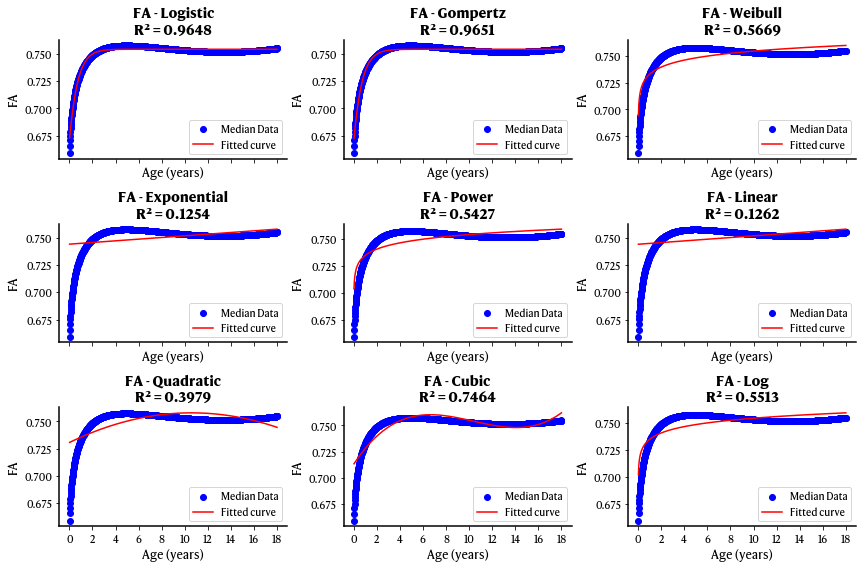

In [165]:
# Curves from the GAMLSS model requires too many info to predict a single value, so we should derive an equation based on the
# median values from the centile dataframes that could be predicted easily from age.
from scipy.optimize import curve_fit

def logistic_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))
def gompertz_func(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))
def weibull_func(x, a, b, c):
    return a * (1 - np.exp(- (b * x) ** c))
def exponential_func(x, a, b):
    return a * np.exp(b * x)
def power_func(x, a, b):
    return a * np.power(x, b)
def linear_func(x, a, b):
    return a * x + b
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c
def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
def log_func(x, a, b):
    return a * np.log(x) + b

# Fit each of the functions to the median data and see which one fits best (R^2)
def fit_and_plot(func, xdata, ydata, ax, title, metric):
    # Initial guess for the parameters
    if func == logistic_func:
        initial_guess = [max(ydata), 0.1, np.median(xdata)]
    elif func == gompertz_func:
        initial_guess = [max(ydata), 1, 0.05]
    elif func == weibull_func:
        initial_guess = [max(ydata), 0.05, 1]
    elif func == exponential_func:
        initial_guess = [min(ydata), 0.01]
    elif func == power_func:
        initial_guess = [min(ydata), 0.5]
    elif func == linear_func:
        initial_guess = [(max(ydata)-min(ydata))/(max(xdata)-min(xdata)), min(ydata)]
    elif func == quadratic_func:
        initial_guess = [1, 1, min(ydata)]
    elif func == cubic_func:
        initial_guess = [1, 1, 1, min(ydata)]
    elif func == log_func:
        initial_guess = [1, min(ydata)]

    # Fit the curve
    params, covariance = curve_fit(func, xdata, ydata, p0=initial_guess, maxfev=100000)

    # Generate fitted values
    yfit = func(xdata, *params)

    # Calculate R^2
    residuals = ydata - yfit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot original data and fitted curve
    ax.scatter(xdata, ydata, label='Median Data', color='blue')
    ax.plot(xdata, yfit, label='Fitted curve', color='red')
    ax.set_title(f"{title}\nR² = {r_squared:.4f}", fontsize=14, fontweight='bold')
    ax.set_xlabel("Age (years)", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    # If y-axis values are very small, use scientific notation
    if ax.get_ylim()[1] < 0.01:
        ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    ax.legend()

    # Formatting stuff.
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[["left", "bottom"]].set_linewidth(1.5)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])

    return params, r_squared

# Prepare data
fa_xdata = fa_centiles['age']
fa_ydata = fa_centiles[0.5]
ad_xdata = ad_centiles['age']
ad_ydata = ad_centiles[0.5]
rd_xdata = rd_centiles['age']
rd_ydata = rd_centiles[0.5]
md_xdata = md_centiles['age']
md_ydata = md_centiles[0.5]

# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
# Fit and plot for each function only on fa metric (6 functions, 6 subplots)
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
fa_params = {}
fa_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, fa_xdata, fa_ydata, ax[i//3, i%3], f"FA - {function_names[i]}", "FA")
    fa_params[function_names[i]] = params
    fa_r2[function_names[i]] = r2


plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/FA_curve_approximations.png", dpi=300)

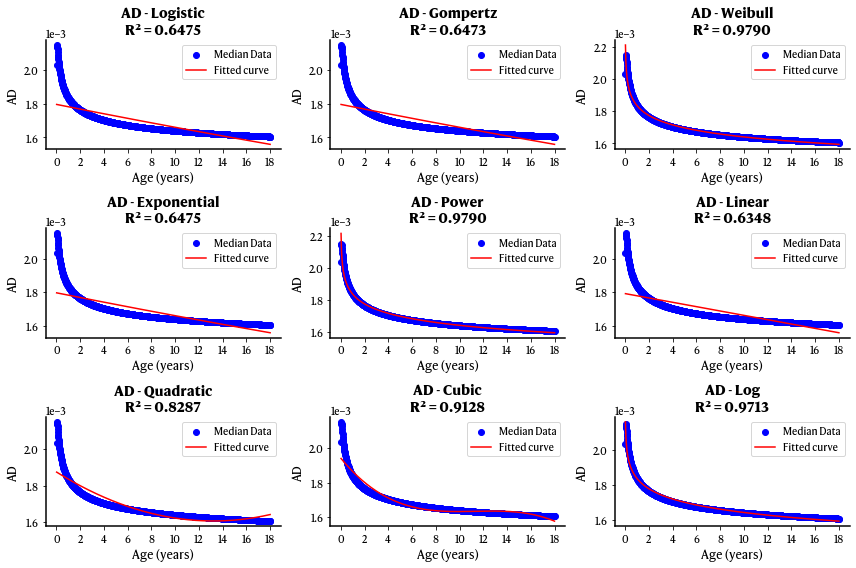

In [166]:
# Do the same thing for AD.
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
# Fit and plot for each function only on ad metric (6 functions, 6 subplots)
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
ad_params = {}
ad_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, ad_xdata, ad_ydata, ax[i//3, i%3], f"AD - {function_names[i]}", "AD")
    ad_params[function_names[i]] = params
    ad_r2[function_names[i]] = r2


plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/AD_curve_approximations.png", dpi=300)

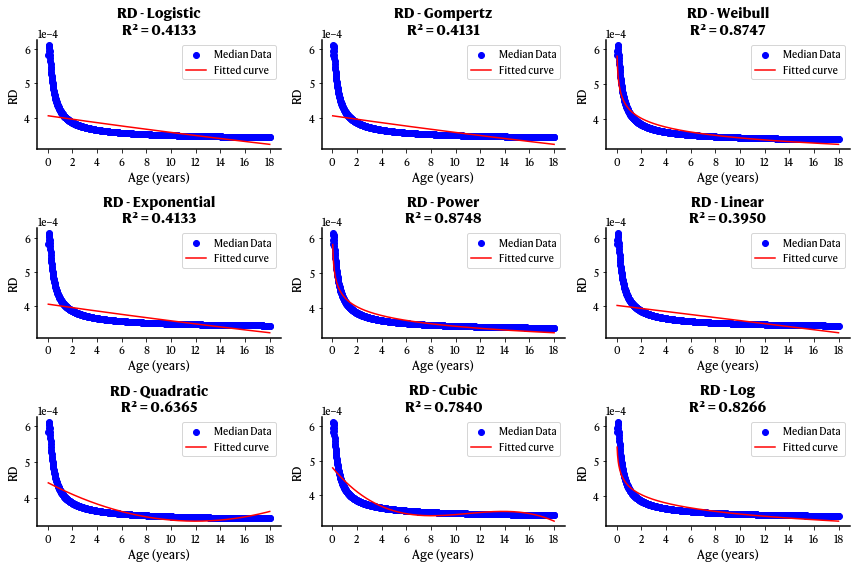

In [167]:
# Same thing for RD.
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
# Fit and plot for each function only on rd metric (6 functions, 6 subplots
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
rd_params = {}
rd_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, rd_xdata, rd_ydata, ax[i//3, i%3], f"RD - {function_names[i]}", "RD")
    rd_params[function_names[i]] = params
    rd_r2[function_names[i]] = r2


plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/RD_curve_approximation.png", dpi=300)

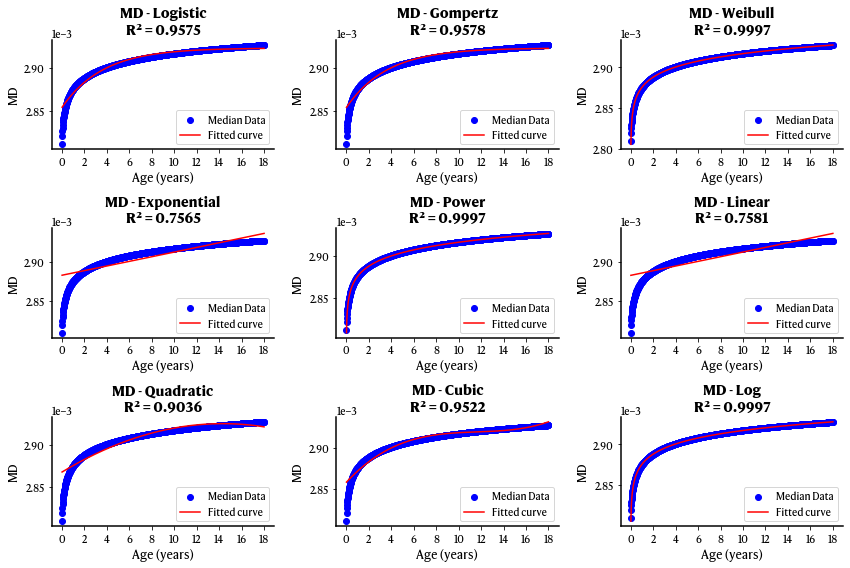

In [168]:
# Same thing for MD.
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
# Fit and plot for each function only on md metric (6 functions, 6 subplots
functions = [logistic_func, gompertz_func, weibull_func, exponential_func, power_func, linear_func, quadratic_func, cubic_func, log_func]
function_names = ["Logistic", "Gompertz", "Weibull", "Exponential", "Power", "Linear", "Quadratic", "Cubic", "Log"]
md_params = {}
md_r2 = {}
for i, func in enumerate(functions):
    params, r2 = fit_and_plot(func, md_xdata, md_ydata, ax[i//3, i%3], f"MD - {function_names[i]}", "MD")
    md_params[function_names[i]] = params
    md_r2[function_names[i]] = r2

plt.tight_layout()
plt.savefig(ROOT_DIR + "Priors/MD_curve_approximation.png", dpi=300)

In [163]:
# For each metric, print the equation of the function with the highest R^2 (write in a nice format for a paper)
def print_best_fit(metric, params_dict, r2_dict):
    best_func = max(r2_dict, key=r2_dict.get)
    best_params = params_dict[best_func]
    best_r2 = r2_dict[best_func]
    
    if best_func == "Logistic":
        equation = f"{metric} = {best_params[0]:.6f} / (1 + exp(-{best_params[1]:.6f} * (age - {best_params[2]:.6f})))"
    elif best_func == "Gompertz":
        equation = f"{metric} = {best_params[0]:.6f} * exp(-{best_params[1]:.6f} * exp(-{best_params[2]:.6f} * age))"
    elif best_func == "Weibull":
        equation = f"{metric} = {best_params[0]:.6f} * (1 - exp(-({best_params[1]:.6f} * age)^{best_params[2]:.6f}))"
    elif best_func == "Exponential":
        equation = f"{metric} = {best_params[0]:.6f} * exp({best_params[1]:.6f} * age)"
    elif best_func == "Power":
        equation = f"{metric} = {best_params[0]:.6f} * age^{best_params[1]:.6f}"
    elif best_func == "Linear":
        equation = f"{metric} = {best_params[0]:.6f} * age + {best_params[1]:.6f}"
    elif best_func == "Quadratic":
        equation = f"{metric} = {best_params[0]:.6f} * age^2 + {best_params[1]:.6f} * age + {best_params[2]:.6f}"
    elif best_func == "Cubic":
        equation = f"{metric} = {best_params[0]:.6f} * age^3 + {best_params[1]:.6f} * age^2 + {best_params[2]:.6f} * age + {best_params[3]:.6f}"
    elif best_func == "Log":
        equation = f"{metric} = {best_params[0]:.6f} * log(age) + {best_params[1]:.6f}"

    print(equation)

print_best_fit("FA", fa_params, fa_r2)
print_best_fit("AD", ad_params, ad_r2)
print_best_fit("RD", rd_params, rd_r2)
print_best_fit("MD", md_params, md_r2)

FA = 0.753938 * exp(-0.117902 * exp(-1.491989 * age))
AD = 0.001835 * age^-0.048725
RD = 0.000430 * age^-0.092705
MD = 0.004116 * (1 - exp(-(3243541.309087 * age)^0.012118))


#### **Computing the *sharpness* of our derived fiber response function**

In [234]:
# Load back the GAMLSS centile data and plot them with the original data.
fa_centiles = pd.read_csv(RESULTS_DIR + "fa_1fiber_centiles_by_age.csv")
ad_centiles = pd.read_csv(RESULTS_DIR + "ad_1fiber_centiles_by_age.csv")
rd_centiles = pd.read_csv(RESULTS_DIR + "rd_1fiber_centiles_by_age.csv")
md_centiles = pd.read_csv(RESULTS_DIR + "md_ventricle_centiles_by_age.csv")

# For each values in the prob column, create a column prob_value so that the resulting df is in the wide format
# with columns age, P3, P10, P25, P50, P75, P90, P97 (all PX columns contain metric values for the corresponding percentiles).
fa_centiles = fa_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
ad_centiles = ad_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_centiles = rd_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
md_centiles = md_centiles.pivot(index="age", columns='prob', values="metric").reset_index()
rd_centiles.drop(0, axis=0, inplace=True)  # Drop the first row which contains NA values.

In [235]:
# Combine the ad and rd centile plots into a single dataframe.
combined_centiles = pd.merge(ad_centiles, rd_centiles, on="age", suffixes=('_ad', '_rd'))
combined_centiles.drop([0, 1], axis=0, inplace=True)  # Drop first two rows with NA values.

# Compute the sharpness factor.
def sharpness(x):
    return ((x["0.5_ad"] + x["0.5_rd"] + x["0.5_rd"]) / 3) * 10000

combined_centiles['sharpness'] = combined_centiles.apply(sharpness, axis=1)

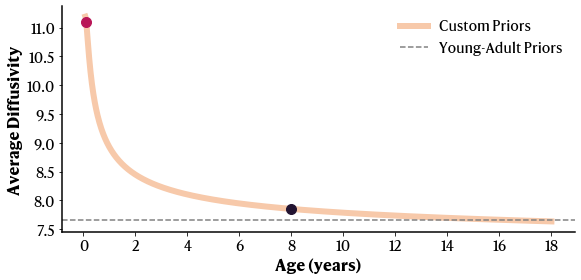

In [241]:
# Plot a lineplot of sharpness vs age
cmap = sns.color_palette("rocket_r", n_colors=10)
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=combined_centiles, x="age", y="sharpness", color=cmap[0], ax=ax, linewidth=6, label="Custom Priors")
ax.axhline((15 + 4 + 4) / 3, color="grey", linewidth=1.5, linestyle='--', label="Young-Adult Priors")
#ax.set_title("Sharpness of Diffusion Metrics vs Age", fontsize=16, fontweight='bold')
ax.set_xlabel("Age (years)", fontsize=16, fontweight='bold')
ax.set_ylabel("Average Diffusivity", fontsize=16, fontweight='bold')
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax.tick_params(axis='both', which='major', labelsize=14)
# Add a single point at 1 month with the corresponding sharpness value
ax.scatter(0.093, 11.09, color=cmap[5], s=100, zorder=3)
ax.scatter(8, 7.85, color=cmap[9], s=100, zorder=3)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.legend(fontsize=14, frameon=False)
plt.tight_layout()
plt.savefig(RESULTS_DIR + "sharpness_vs_age.png", dpi=300, bbox_inches='tight', facecolor='white')

#### **Investigating the before/after priors in the BCP cohort**

The next few cells will investigate how the inclusion of age-adaptable priors affect an association with
language scores.

In [101]:
# Color maps (reuse existing small palettes)
sex_cmap = [cmap[2], cmap[3]]  # two colors for sex

# We have a bunch of tsv for each participant. Let's combine them into a single dataframe for easier plotting.
directory = ROOT_DIR + "PriorsEffect/"

nopriors_file = os.listdir(directory + "tsv_nopriors/")

# For each of those files, we need to remove the sub-234553__ pattern part of the column names.
def clean_column_names(df):
    df.columns = df.columns.str.replace(r"^sub-[^_]+__", "", regex=True)
    return df

# Loop through each file, and concat them into a single df.
all_nopriors = pd.concat([clean_column_names(pd.read_csv(directory + "tsv_nopriors/" + file, sep="\t")) for file in nopriors_file], ignore_index=True)

withpriors_file = os.listdir(directory + "tsv_withpriors/")

all_withpriors = pd.concat([pd.read_csv(directory + "tsv_withpriors/" + file, sep="\t") for file in withpriors_file], ignore_index=True)

In [102]:
# Now, let's load the data from the Mullen scores to merge with those dataframes.
mullen_data = pd.read_csv(ROOT_DIR + "BCP//mullen03.txt", sep="\t")
mullen_data.head(5)

# Let's isolate the left AF from the nopriors data first.
all_AF_nopriors = all_nopriors[all_nopriors['bundle'] == 'AF_L']
all_AF_nopriors.sort_values(by=['sample', 'session'], inplace=True)
all_AF_nopriors.reset_index(drop=True, inplace=True)
all_AF_nopriors.head(5)

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77650/1814061668.py:2: DtypeWarning: Columns (0,1,2,4,6,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,25

,sample,session,bundle,afd_fixel,ad,afd_total,fa,md,mode,nufo,rd
0,sub-011228,ses-12mo,AF_L,0.310804,0.001269,0.311199,0.381310,0.000897,0.147823,2.106981,0.000711
1,sub-011228,ses-18mo,AF_L,0.412794,0.001192,0.332019,0.377572,0.000839,0.225723,2.157091,0.000663
2,sub-011228,ses-46mo,AF_L,0.453269,0.001129,0.362908,0.427945,0.000760,0.235283,1.994471,0.000575
3,sub-011228,ses-9mo,AF_L,0.300394,0.001292,0.294377,0.331962,0.000951,0.185879,2.014275,0.000781
4,sub-017541,ses-47mo,AF_L,0.309978,0.001107,0.331689,0.456376,0.000720,0.432123,2.149045,0.000526


In [103]:
# Let's select the relevant columns and merge with the Mullen data.
mullen_df = mullen_data[['src_subject_id', 'interview_age', 'sex', 'scl4_rl_raw_score', 'scl5_el_raw_score', 'scoresumm_rl_t_score', 'scoresumm_el_t_score']]
mullen_df.rename(columns={'src_subject_id': 'sample', 'interview_age': 'session', 'scl4_rl_raw_score': 'raw_receptive_language', 'scl5_el_raw_score': 'raw_expressive_language',
                            'scoresumm_rl_t_score': 't_receptive_language', 'scoresumm_el_t_score': 't_expressive_language'}, inplace=True)

# Make sure the sample columns contains 6 digits by padding with leading zeros. then append with sub-
mullen_df['sample'] = mullen_df['sample'].apply(lambda x: str(x).zfill(6))
mullen_df['sample'] = 'sub-' + mullen_df['sample']

# Duplicate the session column to create a age column.
mullen_df['age'] = mullen_df['session']

# For the session column, append ses- at the start and mo at the end
mullen_df['session'] = mullen_df['session'].apply(lambda x: 'ses-' + str(x) + 'mo')
mullen_df.drop(0, axis=0, inplace=True)  # Drop first row with NA values.


/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77650/2718371471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mullen_df.rename(columns={'src_subject_id': 'sample', 'interview_age': 'session', 'scl4_rl_raw_score': 'raw_receptive_language', 'scl5_el_raw_score': 'raw_expressive_language',
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77650/2718371471.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mullen_df['sample'] = mullen_df['sample'].apply(lambda x: str(x).zfill(6))
/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77

In [104]:
# Merge both dataframes on the sample and session columns
merged_nopriors = pd.merge(all_AF_nopriors, mullen_df, on=['sample', 'session'])

# Change the data types of the language score columns to numeric
merged_nopriors['raw_receptive_language'] = pd.to_numeric(merged_nopriors['raw_receptive_language'], errors='coerce')
merged_nopriors['raw_expressive_language'] = pd.to_numeric(merged_nopriors['raw_expressive_language'], errors='coerce')
merged_nopriors['t_receptive_language'] = pd.to_numeric(merged_nopriors['t_receptive_language'], errors='coerce')
merged_nopriors['t_expressive_language'] = pd.to_numeric(merged_nopriors['t_expressive_language'], errors='coerce')
merged_nopriors['age'] = pd.to_numeric(merged_nopriors['age'], errors='coerce')

# Drop rows that are duplicated based on all columns.
merged_nopriors.drop_duplicates(inplace=True)
# Drop the 999 values in the language score columns
merged_nopriors = merged_nopriors[(merged_nopriors['raw_receptive_language'] != 999) & (merged_nopriors['raw_expressive_language'] != 999) &
                                  (merged_nopriors['t_receptive_language'] != 999) & (merged_nopriors['t_expressive_language'] != 999)]
merged_nopriors

,sample,session,bundle,afd_fixel,ad,afd_total,fa,md,mode,nufo,rd,sex,raw_receptive_language,raw_expressive_language,t_receptive_language,t_expressive_language,age
0,sub-011228,ses-12mo,AF_L,0.310804,0.001269,0.311199,0.381310,0.000897,0.147823,2.106981,0.000711,M,14.0,16.0,55.0,72.0,12
2,sub-011228,ses-9mo,AF_L,0.300394,0.001292,0.294377,0.331962,0.000951,0.185879,2.014275,0.000781,M,12.0,13.0,55.0,66.0,9
4,sub-051407,ses-12mo,AF_L,0.235534,0.001207,0.289780,0.326217,0.000897,0.111346,2.370863,0.000742,F,14.0,9.0,50.0,33.0,12
7,sub-051407,ses-15mo,AF_L,0.288361,0.001201,0.314472,0.343137,0.000881,0.090096,2.296418,0.000721,F,24.0,16.0,72.0,50.0,15
10,sub-051407,ses-18mo,AF_L,0.294481,0.001152,0.319241,0.362401,0.000825,0.201729,2.110737,0.000662,F,25.0,17.0,69.0,48.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,sub-986700,ses-44mo,AF_L,0.484870,0.001127,0.347853,0.424011,0.000756,0.336957,2.473165,0.000570,M,32.0,38.0,39.0,50.0,44
473,sub-987008,ses-24mo,AF_L,0.408194,0.001056,0.332496,0.399387,0.000730,0.186343,2.833470,0.000566,M,25.0,19.0,52.0,41.0,24
476,sub-994816,ses-11mo,AF_L,0.339032,0.001343,0.275783,0.313212,0.001002,0.262770,1.986400,0.000832,M,10.0,12.0,35.0,51.0,11
477,sub-995663,ses-5mo,AF_L,0.204971,0.001291,0.220461,0.301678,0.000977,0.168032,2.786502,0.000819,F,7.0,5.0,58.0,48.0,5


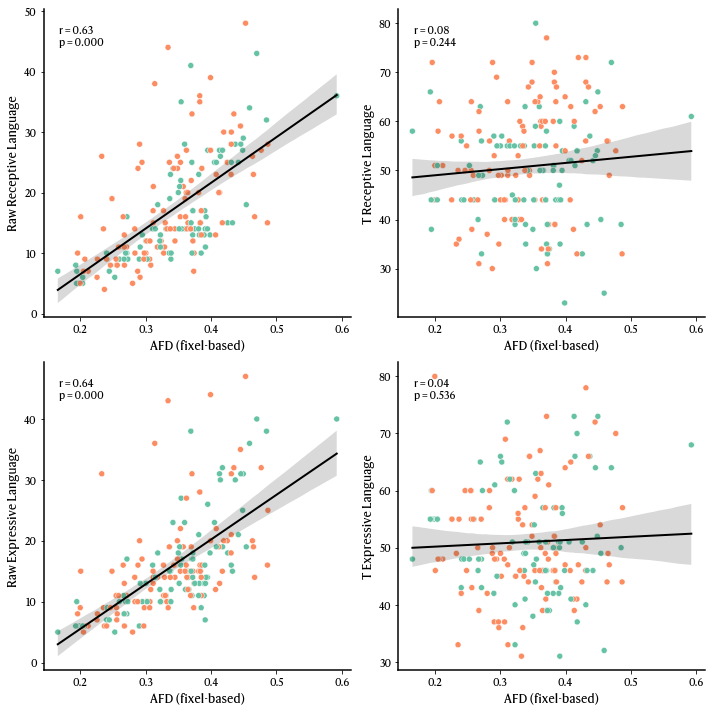

In [105]:
# Now let's plot a simple scatterplot of afd_fixel vs raw_receptive_language
# Drop rows with NA values in either column
merged_nopriors.dropna(subset=['afd_fixel', 'raw_receptive_language'], inplace=True)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for var in ['raw_receptive_language', 'raw_expressive_language', 't_receptive_language', 't_expressive_language']:
    row = 0 if 'receptive' in var else 1
    col = 0 if 'raw' in var else 1
    sns.scatterplot(data=merged_nopriors, x='afd_fixel', y=var, hue='sex', palette="Set2", ax=ax[row][col], legend=False)
    sns.regplot(data=merged_nopriors, x='afd_fixel', y=var, scatter=False, ax=ax[row][col], color='black', line_kws={'linewidth':2})
    ax[row][col].set_xlabel("AFD (fixel-based)", fontsize=12)
    ax[row][col].set_ylabel(var.replace('_', ' ').title(), fontsize=12)
    ax[row][col].tick_params(axis='both', which='major', labelsize=10)
    ax[row][col].spines[['top', 'right']].set_visible(False)
    ax[row][col].spines[["left", "bottom"]].set_linewidth(1.5)

    r, p = pearsonr(merged_nopriors['afd_fixel'], merged_nopriors[var])
    ax[row][col].text(0.05, 0.95, f"r = {r:.2f}\np = {p:.3f}", transform=ax[row][col].transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

In [106]:
# Do the same with the with priors data.
all_AF_withpriors = all_withpriors[all_withpriors['bundle'] == 'AF_L']
all_AF_withpriors.sort_values(by=['sample', 'session'], inplace=True)
all_AF_withpriors.reset_index(drop=True, inplace=True)

merged_withpriors = pd.merge(all_AF_withpriors, mullen_df, on=['sample', 'session'])

merged_withpriors['raw_receptive_language'] = pd.to_numeric(merged_withpriors['raw_receptive_language'], errors='coerce')
merged_withpriors['raw_expressive_language'] = pd.to_numeric(merged_withpriors['raw_expressive_language'], errors='coerce')
merged_withpriors['t_receptive_language'] = pd.to_numeric(merged_withpriors['t_receptive_language'], errors='coerce')
merged_withpriors['t_expressive_language'] = pd.to_numeric(merged_withpriors['t_expressive_language'], errors='coerce')
merged_withpriors['age'] = pd.to_numeric(merged_withpriors['age'], errors='coerce')
merged_withpriors.drop_duplicates(inplace=True)
merged_withpriors = merged_withpriors[(merged_withpriors['raw_receptive_language'] != 999) & (merged_withpriors['raw_expressive_language'] != 999) &
                                      (merged_withpriors['t_receptive_language'] != 999) & (merged_withpriors['t_expressive_language'] != 999)]
merged_withpriors

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77650/1819094061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_AF_withpriors.sort_values(by=['sample', 'session'], inplace=True)


,sample,session,bundle,ad,afd_fixel,afd_max,afd_sum,afd_total,fa,md,nufo,rd,sex,raw_receptive_language,raw_expressive_language,t_receptive_language,t_expressive_language,age
0,sub-011228,ses-12mo,AF_L,0.001254,0.291615,0.850215,0.703670,0.344342,0.366274,0.000897,2.441322,0.000719,M,14.0,16.0,55.0,72.0,12
2,sub-011228,ses-9mo,AF_L,0.001290,0.270285,0.717971,0.614983,0.329462,0.319203,0.000962,2.232654,0.000798,M,12.0,13.0,55.0,66.0,9
4,sub-051407,ses-12mo,AF_L,0.001208,0.226664,0.690163,0.600326,0.318766,0.318904,0.000904,2.695771,0.000753,F,14.0,9.0,50.0,33.0,12
7,sub-051407,ses-15mo,AF_L,0.001209,0.315054,0.839761,0.694421,0.342031,0.372691,0.000868,2.334501,0.000698,F,24.0,16.0,72.0,50.0,15
10,sub-051407,ses-18mo,AF_L,0.001153,0.271415,0.829152,0.689514,0.351248,0.351745,0.000835,2.412977,0.000675,F,25.0,17.0,69.0,48.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,sub-986700,ses-44mo,AF_L,0.001127,0.495593,1.078439,0.833602,0.371945,0.422792,0.000757,2.773699,0.000571,M,32.0,38.0,39.0,50.0,44
489,sub-987008,ses-24mo,AF_L,0.001057,0.414072,0.918009,0.754739,0.367736,0.408603,0.000724,3.311484,0.000557,M,25.0,19.0,52.0,41.0,24
492,sub-994816,ses-11mo,AF_L,0.001336,0.330547,0.739769,0.603415,0.304973,0.306864,0.001002,2.158048,0.000836,M,10.0,12.0,35.0,51.0,11
493,sub-995663,ses-5mo,AF_L,0.001284,0.263233,0.639085,0.565670,0.292700,0.299645,0.000974,3.418283,0.000819,F,7.0,5.0,58.0,48.0,5


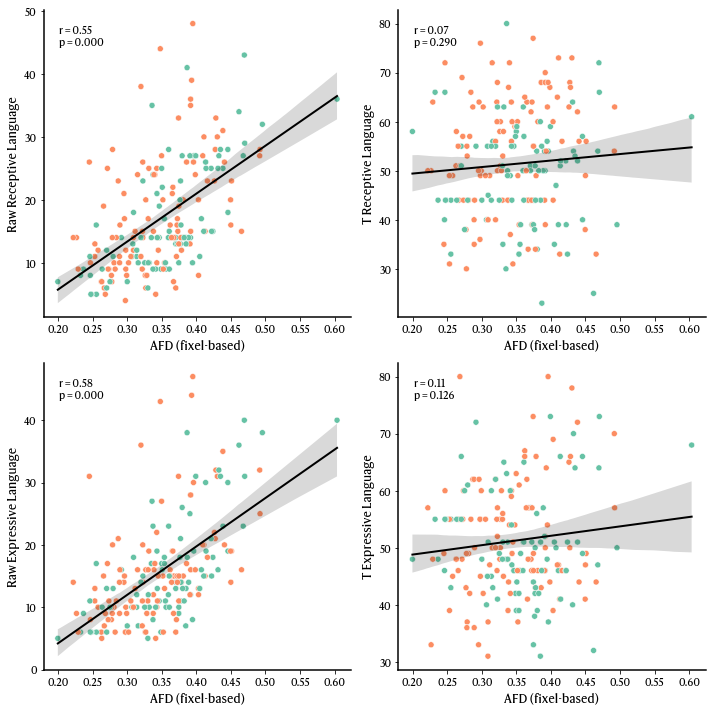

In [107]:
# Plot the scatterplot
# Drop rows with NA values in afd_fixel or raw_receptive_language
merged_withpriors.dropna(subset=['afd_fixel', 'raw_receptive_language'], inplace=True)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for var in ['raw_receptive_language', 'raw_expressive_language', 't_receptive_language', 't_expressive_language']:
    row = 0 if 'receptive' in var else 1
    col = 0 if 'raw' in var else 1
    sns.scatterplot(data=merged_withpriors, x='afd_fixel', y=var, hue='sex', palette="Set2", ax=ax[row][col], legend=False)
    sns.regplot(data=merged_withpriors, x='afd_fixel', y=var, scatter=False, ax=ax[row][col], color='black', line_kws={'linewidth':2})
    ax[row][col].set_xlabel("AFD (fixel-based)", fontsize=12)
    ax[row][col].set_ylabel(var.replace('_', ' ').title(), fontsize=12)
    ax[row][col].tick_params(axis='both', which='major', labelsize=10)
    ax[row][col].spines[['top', 'right']].set_visible(False)
    ax[row][col].spines[["left", "bottom"]].set_linewidth(1.5)

    r, p = pearsonr(merged_withpriors['afd_fixel'], merged_withpriors[var])
    ax[row][col].text(0.05, 0.95, f"r = {r:.2f}\np = {p:.3f}", transform=ax[row][col].transAxes, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

In [108]:
# Let's run a multiple linear regression to see if afd_fixel predicts language scores when controlling for age and sex.
import statsmodels.api as sm

results_nopriors = {}

for var in ['raw_receptive_language', 'raw_expressive_language', 't_receptive_language', 't_expressive_language']:
    X_nopriors = merged_nopriors[['afd_fixel', 'age', 'sex']]
    X_nopriors = pd.get_dummies(X_nopriors, columns=['sex'], drop_first=False, dtype=int)
    y_nopriors = merged_nopriors[var]
    X_nopriors = sm.add_constant(X_nopriors)
    model_nopriors = sm.OLS(y_nopriors, X_nopriors).fit()
    results_nopriors[var] = model_nopriors
    print(f"Multiple Linear Regression Results for {var} (No Priors):")
    print(model_nopriors.summary())

Multiple Linear Regression Results for raw_receptive_language (No Priors):
                              OLS Regression Results                              
Dep. Variable:     raw_receptive_language   R-squared:                       0.864
Model:                                OLS   Adj. R-squared:                  0.862
Method:                     Least Squares   F-statistic:                     399.7
Date:                    Fri, 07 Nov 2025   Prob (F-statistic):           1.51e-81
Time:                            11:28:38   Log-Likelihood:                -501.38
No. Observations:                     193   AIC:                             1011.
Df Residuals:                         189   BIC:                             1024.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [109]:
# same thing for with priors data.
results_withpriors = {}

for var in ['raw_receptive_language', 'raw_expressive_language', 't_receptive_language', 't_expressive_language']:
    X_withpriors = merged_withpriors[['afd_fixel', 'age', 'sex']]
    X_withpriors = pd.get_dummies(X_withpriors, columns=['sex'], drop_first=False, dtype=int)
    y_withpriors = merged_withpriors[var]
    X_withpriors = sm.add_constant(X_withpriors)
    model_withpriors = sm.OLS(y_withpriors, X_withpriors).fit()
    results_withpriors[var] = model_withpriors
    print(f"Multiple Linear Regression Results for {var} (With Priors):")
    print(model_withpriors.summary())

Multiple Linear Regression Results for raw_receptive_language (With Priors):
                              OLS Regression Results                              
Dep. Variable:     raw_receptive_language   R-squared:                       0.860
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     404.7
Date:                    Fri, 07 Nov 2025   Prob (F-statistic):           6.21e-84
Time:                            11:28:39   Log-Likelihood:                -524.35
No. Observations:                     201   AIC:                             1057.
Df Residuals:                         197   BIC:                             1070.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77650/273016112.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


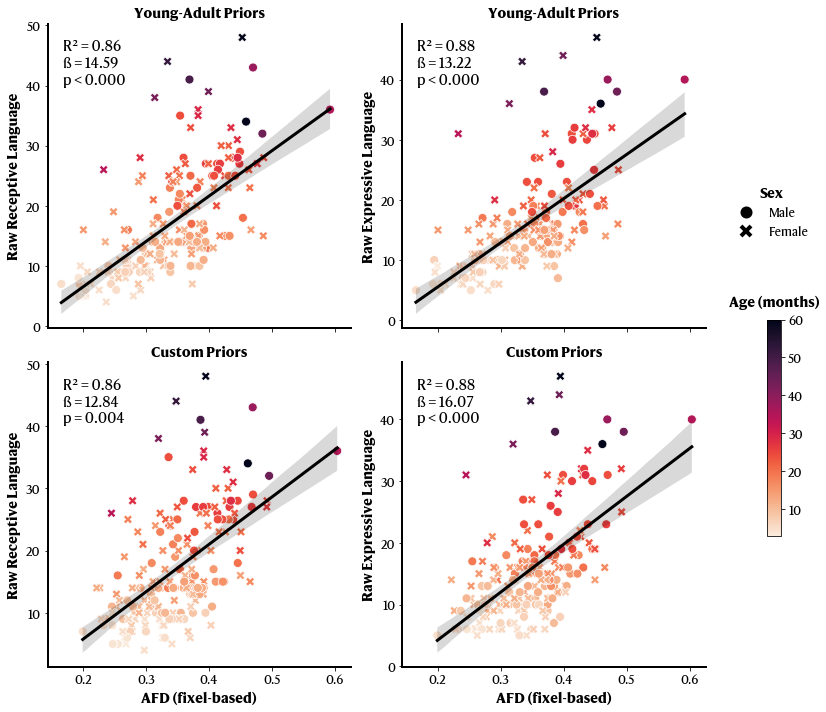

In [203]:
# Let's plot 4 subplots, top row for both raw language scores with the no priors data,
# bottom row for raw language scores with the with priors data.
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=False)
for i, var in enumerate(['raw_receptive_language', 'raw_expressive_language']):
    sns.scatterplot(data=merged_nopriors, x='afd_fixel', y=var, hue='age', style="sex", palette='rocket_r', s=80, ax=ax[0][i], legend=False)
    sns.regplot(data=merged_nopriors, x='afd_fixel', y=var, scatter=False, ax=ax[0][i], color='black', line_kws={'linewidth':3})
    ax[0][i].set_title("Young-Adult Priors", fontsize=14, fontweight='bold')
    ax[0][i].set_xlabel("AFD (fixel-based)", fontsize=14, fontweight='bold')
    ax[0][i].set_ylabel(var.replace('_', ' ').title(), fontsize=14, fontweight='bold')
    ax[0][i].tick_params(axis='both', which='major', labelsize=12)
    ax[0][i].spines[['top', 'right']].set_visible(False)
    ax[0][i].spines[["left", "bottom"]].set_linewidth(2)

    # Use the regression results to add R², coefficient for afd_fixel and p-value to the plot
    model = results_nopriors[var]
    r_squared = model.rsquared
    coef_afd = model.params['afd_fixel']
    p_value_afd = model.pvalues['afd_fixel']
    ax[0][i].text(0.05, 0.95, f"R² = {r_squared:.2f}\nß = {coef_afd:.2f}\np {'<' if p_value_afd < 0.001 else '='} {p_value_afd:.3f}", transform=ax[0][i].transAxes, fontsize=14, verticalalignment='top')

for i, var in enumerate(['raw_receptive_language', 'raw_expressive_language']):
    sns.scatterplot(data=merged_withpriors, x='afd_fixel', y=var, hue='age', style="sex", palette="rocket_r", s=80, ax=ax[1][i], legend=False)
    sns.regplot(data=merged_withpriors, x='afd_fixel', y=var, scatter=False, ax=ax[1][i], color='black', line_kws={'linewidth':3})
    ax[1][i].set_title("Custom Priors", fontsize=14, fontweight='bold')
    ax[1][i].set_xlabel("AFD (fixel-based)", fontsize=14, fontweight='bold')
    ax[1][i].set_ylabel(var.replace('_', ' ').title(), fontsize=14, fontweight='bold')
    ax[1][i].tick_params(axis='both', which='major', labelsize=12)
    ax[1][i].spines[['top', 'right']].set_visible(False)
    ax[1][i].spines[["left", "bottom"]].set_linewidth(2)
    # Use the regression results to add R², coefficient for afd_fixel and p-value to the plot
    model = results_withpriors[var]
    r_squared = model.rsquared
    coef_afd = model.params['afd_fixel']
    p_value_afd = model.pvalues['afd_fixel']
    ax[1][i].text(0.05, 0.95, f"R² = {r_squared:.2f}\nß = {coef_afd:.2f}\np {'<' if p_value_afd < 0.001 else '='} {p_value_afd:.3f}", transform=ax[1][i].transAxes, fontsize=14, verticalalignment='top')

# Let's do a global legend that includes both sex and age size mapping.
handles_sex = [plt.Line2D([0], [0], color="black", markersize=10, lw=0, marker="o", markeredgewidth=2, markeredgecolor='black'),
               plt.Line2D([0], [0], color="black", markersize=10, lw=0, marker="x", markeredgewidth=4, markeredgecolor='black')]
labels_sex = ["Male", "Female"]
fig.legend(handles_sex, labels_sex, loc="upper left", bbox_to_anchor=(1.01, 0.75), ncol=1, fontsize=12, title="Sex", title_fontproperties={'size': 14, 'weight': 'bold'}, frameon=False)

# Age colorbar
sm = plt.cm.ScalarMappable(cmap="rocket_r", norm=plt.Normalize(vmin=merged_nopriors['age'].min(), vmax=merged_nopriors['age'].max()))
sm.set_array([])

cax = fig.add_axes([1.07, 0.25, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', fraction=0.01, pad=0.2, use_gridspec=True)
cbar.ax.tick_params(labelsize=12)
cbar.ax.text(0.5, 1.05, 'Age (months)', fontsize=14, fontweight='bold', ha='center', va='bottom', transform=cbar.ax.transAxes)

plt.tight_layout()
plt.savefig(directory + "AFD_language_scores_comparison.png", dpi=300, bbox_inches='tight', facecolor='white')

In [211]:
# Now, same thing but with the AF_R.
all_AF_R_nopriors = all_nopriors[all_nopriors['bundle'] == 'AF_R']
all_AF_R_nopriors.sort_values(by=['sample', 'session'], inplace=True)
all_AF_R_nopriors.reset_index(drop=True, inplace=True)

merged_R_nopriors = pd.merge(all_AF_R_nopriors, mullen_df, on=['sample', 'session'])
merged_R_nopriors['raw_receptive_language'] = pd.to_numeric(merged_R_nopriors['raw_receptive_language'], errors='coerce')
merged_R_nopriors['raw_expressive_language'] = pd.to_numeric(merged_R_nopriors['raw_expressive_language'], errors='coerce')
merged_R_nopriors['t_receptive_language'] = pd.to_numeric(merged_R_nopriors['t_receptive_language'], errors='coerce')
merged_R_nopriors['t_expressive_language'] = pd.to_numeric(merged_R_nopriors['t_expressive_language'], errors='coerce')
merged_R_nopriors['age'] = pd.to_numeric(merged_R_nopriors['age'], errors='coerce')
merged_R_nopriors.drop_duplicates(inplace=True)
merged_R_nopriors.dropna(subset=['afd_fixel', 'raw_receptive_language', 'raw_expressive_language', 't_receptive_language', 't_expressive_language'], inplace=True)
merged_R_nopriors = merged_R_nopriors[(merged_R_nopriors['raw_receptive_language'] != 999) & (merged_R_nopriors['raw_expressive_language'] != 999) &
                                      (merged_R_nopriors['t_receptive_language'] != 999) & (merged_R_nopriors['t_expressive_language'] != 999)]
merged_R_nopriors

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77650/1036062316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_AF_R_nopriors.sort_values(by=['sample', 'session'], inplace=True)


,sample,session,bundle,afd_fixel,ad,afd_total,fa,md,mode,nufo,rd,sex,raw_receptive_language,raw_expressive_language,t_receptive_language,t_expressive_language,age
0,sub-011228,ses-12mo,AF_R,0.304332,0.001200,0.315615,0.322670,0.000885,0.235405,2.271041,0.000727,M,14.0,16.0,55.0,72.0,12
2,sub-011228,ses-9mo,AF_R,0.255736,0.001256,0.300954,0.323382,0.000934,0.152480,2.209006,0.000773,M,12.0,13.0,55.0,66.0,9
4,sub-051407,ses-12mo,AF_R,0.239291,0.001213,0.277313,0.300836,0.000916,0.221200,2.387491,0.000768,F,14.0,9.0,50.0,33.0,12
7,sub-051407,ses-15mo,AF_R,0.309662,0.001163,0.316510,0.336617,0.000853,0.214417,2.291480,0.000698,F,24.0,16.0,72.0,50.0,15
10,sub-051407,ses-18mo,AF_R,0.252024,0.001156,0.314506,0.325154,0.000855,0.206932,2.268354,0.000705,F,25.0,17.0,69.0,48.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,sub-986700,ses-44mo,AF_R,0.415443,0.001127,0.341583,0.430786,0.000751,0.340875,2.458257,0.000564,M,32.0,38.0,39.0,50.0,44
476,sub-987008,ses-24mo,AF_R,0.381411,0.001081,0.325003,0.369463,0.000765,0.229984,2.957766,0.000607,M,25.0,19.0,52.0,41.0,24
479,sub-994816,ses-11mo,AF_R,0.321948,0.001314,0.280797,0.291359,0.000997,0.275935,2.137388,0.000839,M,10.0,12.0,35.0,51.0,11
480,sub-995663,ses-5mo,AF_R,0.202109,0.001300,0.222784,0.316594,0.000970,0.180436,2.702429,0.000806,F,7.0,5.0,58.0,48.0,5


In [212]:
all_AF_R_withpriors = all_withpriors[all_withpriors['bundle'] == 'AF_R']
all_AF_R_withpriors.sort_values(by=['sample', 'session'], inplace=True)
all_AF_R_withpriors.reset_index(drop=True, inplace=True)

merged_R_withpriors = pd.merge(all_AF_R_withpriors, mullen_df, on=['sample', 'session'])
merged_R_withpriors['raw_receptive_language'] = pd.to_numeric(merged_R_withpriors['raw_receptive_language'], errors='coerce')
merged_R_withpriors['raw_expressive_language'] = pd.to_numeric(merged_R_withpriors['raw_expressive_language'], errors='coerce')
merged_R_withpriors['t_receptive_language'] = pd.to_numeric(merged_R_withpriors['t_receptive_language'], errors='coerce')
merged_R_withpriors['t_expressive_language'] = pd.to_numeric(merged_R_withpriors['t_expressive_language'], errors='coerce')
merged_R_withpriors['age'] = pd.to_numeric(merged_R_withpriors['age'], errors='coerce')
merged_R_withpriors.drop_duplicates(inplace=True)
merged_R_withpriors.dropna(subset=['afd_fixel', 'raw_receptive_language', 'raw_expressive_language', 't_receptive_language', 't_expressive_language'], inplace=True)
merged_R_withpriors = merged_R_withpriors[(merged_R_withpriors['raw_receptive_language'] != 999) & (merged_R_withpriors['raw_expressive_language'] != 999) &
                                        (merged_R_withpriors['t_receptive_language'] != 999) & (merged_R_withpriors['t_expressive_language'] != 999)]
merged_R_withpriors

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77650/2128393707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_AF_R_withpriors.sort_values(by=['sample', 'session'], inplace=True)


,sample,session,bundle,ad,afd_fixel,afd_max,afd_sum,afd_total,fa,md,nufo,rd,sex,raw_receptive_language,raw_expressive_language,t_receptive_language,t_expressive_language,age
0,sub-011228,ses-12mo,AF_R,0.001197,0.299045,0.827935,0.683476,0.347823,0.324802,0.000882,2.540755,0.000724,M,14.0,16.0,55.0,72.0,12
2,sub-011228,ses-9mo,AF_R,0.001266,0.260631,0.726361,0.636785,0.341353,0.334751,0.000934,2.433516,0.000768,M,12.0,13.0,55.0,66.0,9
4,sub-051407,ses-12mo,AF_R,0.001211,0.236961,0.651785,0.564294,0.304905,0.292433,0.000922,2.718403,0.000777,F,14.0,9.0,50.0,33.0,12
7,sub-051407,ses-15mo,AF_R,0.001173,0.303052,0.790591,0.664549,0.346614,0.337929,0.000856,2.442921,0.000698,F,24.0,16.0,72.0,50.0,15
10,sub-051407,ses-18mo,AF_R,0.001155,0.252064,0.756690,0.646413,0.344648,0.315963,0.000861,2.586502,0.000715,F,25.0,17.0,69.0,48.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,sub-986700,ses-44mo,AF_R,0.001129,0.416548,1.027504,0.809062,0.365648,0.432359,0.000752,2.752391,0.000564,M,32.0,38.0,39.0,50.0,44
486,sub-987008,ses-24mo,AF_R,0.001083,0.383017,0.833365,0.706936,0.357694,0.381181,0.000760,3.413323,0.000598,M,25.0,19.0,52.0,41.0,24
489,sub-994816,ses-11mo,AF_R,0.001311,0.311347,0.726312,0.599148,0.309996,0.293691,0.000994,2.315350,0.000836,M,10.0,12.0,35.0,51.0,11
490,sub-995663,ses-5mo,AF_R,0.001297,0.246516,0.661060,0.580037,0.297296,0.314632,0.000971,3.321756,0.000807,F,7.0,5.0,58.0,48.0,5


In [210]:
X_nopriors

,const,afd_fixel,age,sex_F,sex_M
0,1.0,0.304332,12,0,1
2,1.0,0.255736,9,0,1
4,1.0,0.239291,12,1,0
7,1.0,0.309662,15,1,0
10,1.0,0.252024,18,1,0
...,...,...,...,...,...
475,1.0,0.415443,44,0,1
476,1.0,0.381411,24,0,1
479,1.0,0.321948,11,0,1
480,1.0,0.202109,5,1,0


In [213]:
# Let's run a multiple linear regression to see if afd_fixel predicts language scores when controlling for age and sex.
results_nopriors_AF_R = {}
import statsmodels.api as sm

for var in ['raw_receptive_language', 'raw_expressive_language', 't_receptive_language', 't_expressive_language']:
    X_nopriors = merged_R_nopriors[['afd_fixel', 'age', 'sex']]
    X_nopriors = pd.get_dummies(X_nopriors, columns=['sex'], drop_first=False, dtype=int)
    y_nopriors = merged_R_nopriors[var]
    X_nopriors = sm.add_constant(X_nopriors)
    model_nopriors = sm.OLS(y_nopriors, X_nopriors).fit()
    results_nopriors_AF_R[var] = model_nopriors
    print(f"Multiple Linear Regression Results for {var} (No Priors):")
    print(model_nopriors.summary())

Multiple Linear Regression Results for raw_receptive_language (No Priors):
                              OLS Regression Results                              
Dep. Variable:     raw_receptive_language   R-squared:                       0.863
Model:                                OLS   Adj. R-squared:                  0.860
Method:                     Least Squares   F-statistic:                     397.5
Date:                    Fri, 07 Nov 2025   Prob (F-statistic):           1.36e-81
Time:                            16:06:31   Log-Likelihood:                -504.88
No. Observations:                     194   AIC:                             1018.
Df Residuals:                         190   BIC:                             1031.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [214]:
# same thing for with priors data.
results_withpriors_AF_R = {}

for var in ['raw_receptive_language', 'raw_expressive_language', 't_receptive_language', 't_expressive_language']:
    X_withpriors = merged_R_withpriors[['afd_fixel', 'age', 'sex']]
    X_withpriors = pd.get_dummies(X_withpriors, columns=['sex'], drop_first=False, dtype=int)
    y_withpriors = merged_R_withpriors[var]
    X_withpriors = sm.add_constant(X_withpriors)
    model_withpriors = sm.OLS(y_withpriors, X_withpriors).fit()
    results_withpriors_AF_R[var] = model_withpriors
    print(f"Multiple Linear Regression Results for {var} (With Priors):")
    print(model_withpriors.summary())

Multiple Linear Regression Results for raw_receptive_language (With Priors):
                              OLS Regression Results                              
Dep. Variable:     raw_receptive_language   R-squared:                       0.858
Model:                                OLS   Adj. R-squared:                  0.856
Method:                     Least Squares   F-statistic:                     391.1
Date:                    Fri, 07 Nov 2025   Prob (F-statistic):           5.70e-82
Time:                            16:07:42   Log-Likelihood:                -518.45
No. Observations:                     198   AIC:                             1045.
Df Residuals:                         194   BIC:                             1058.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

/var/folders/23/p0fh1nrd473dtfz3cx_4g0j00000gn/T/ipykernel_77650/3612931038.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


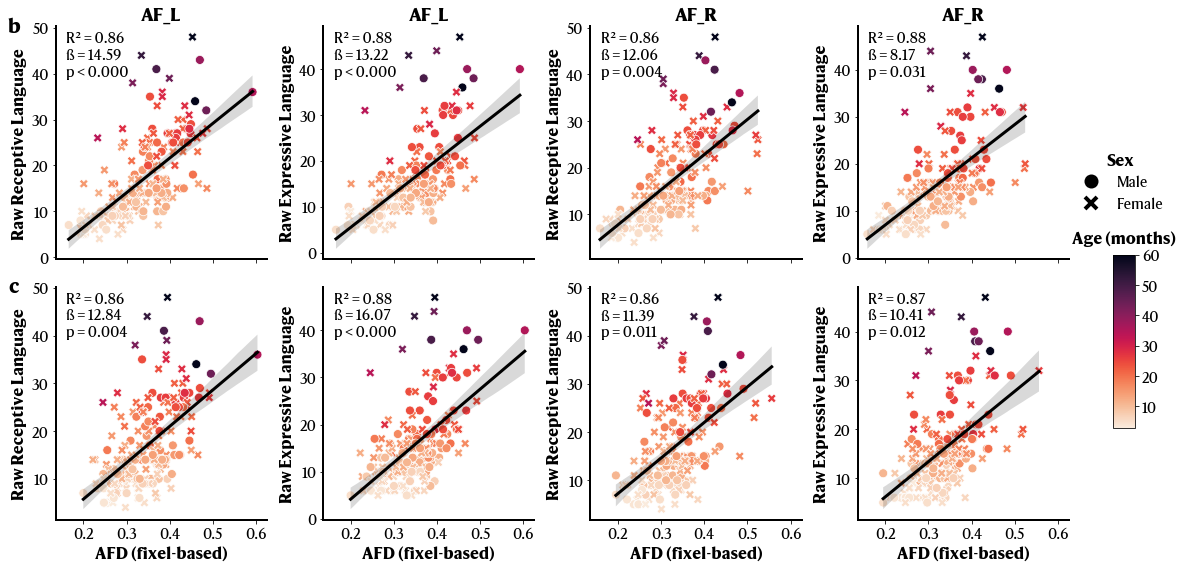

In [232]:
# Plot everything while combining both AF_L and AF_R results.
fig, ax = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=False)
for i, var in enumerate(['raw_receptive_language', 'raw_expressive_language']):
    sns.scatterplot(data=merged_nopriors, x='afd_fixel', y=var, hue='age', style="sex", palette='rocket_r', s=80, ax=ax[0][i], legend=False)
    sns.regplot(data=merged_nopriors, x='afd_fixel', y=var, scatter=False, ax=ax[0][i], color='black', line_kws={'linewidth':3})
    ax[0][i].set_title("AF_L", fontsize=18, fontweight='bold')
    ax[0][i].set_xlabel("AFD (fixel-based)", fontsize=16, fontweight='bold')
    ax[0][i].set_ylabel(var.replace('_', ' ').title(), fontsize=16, fontweight='bold')
    ax[0][i].tick_params(axis='both', which='major', labelsize=14)
    ax[0][i].spines[['top', 'right']].set_visible(False)
    ax[0][i].spines[["left", "bottom"]].set_linewidth(2)
    model = results_nopriors[var]
    r_squared = model.rsquared
    coef_afd = model.params['afd_fixel']
    p_value_afd = model.pvalues['afd_fixel']
    ax[0][i].text(0.05, 0.98, f"R² = {r_squared:.2f}\nß = {coef_afd:.2f}\np {'<' if p_value_afd < 0.001 else '='} {p_value_afd:.3f}", transform=ax[0][i].transAxes, fontsize=14, verticalalignment='top')

for i, var in enumerate(['raw_receptive_language', 'raw_expressive_language']):
    sns.scatterplot(data=merged_R_nopriors, x='afd_fixel', y=var, hue='age', style="sex", palette='rocket_r', s=80, ax=ax[0][i+2], legend=False)
    sns.regplot(data=merged_R_nopriors, x='afd_fixel', y=var, scatter=False, ax=ax[0][i+2], color='black', line_kws={'linewidth':3})
    ax[0][i+2].set_title("AF_R", fontsize=18, fontweight='bold')
    ax[0][i+2].set_xlabel("AFD (fixel-based)", fontsize=16, fontweight='bold')
    ax[0][i+2].set_ylabel(var.replace('_', ' ').title(), fontsize=16, fontweight='bold')
    ax[0][i+2].tick_params(axis='both', which='major', labelsize=14)
    ax[0][i+2].spines[['top', 'right']].set_visible(False)
    ax[0][i+2].spines[["left", "bottom"]].set_linewidth(2)
    model = results_nopriors_AF_R[var]
    r_squared = model.rsquared
    coef_afd = model.params['afd_fixel']
    p_value_afd = model.pvalues['afd_fixel']
    ax[0][i+2].text(0.05, 0.98, f"R² = {r_squared:.2f}\nß = {coef_afd:.2f}\np {'<' if p_value_afd < 0.001 else '='} {p_value_afd:.3f}", transform=ax[0][i+2].transAxes, fontsize=14, verticalalignment='top')

for i, var in enumerate(['raw_receptive_language', 'raw_expressive_language']):
    sns.scatterplot(data=merged_withpriors, x='afd_fixel', y=var, hue='age', style="sex", palette="rocket_r", s=80, ax=ax[1][i], legend=False)
    sns.regplot(data=merged_withpriors, x='afd_fixel', y=var, scatter=False, ax=ax[1][i], color='black', line_kws={'linewidth':3})
    #ax[1][i].set_title("Custom Priors - AF_L", fontsize=14, fontweight='bold')
    ax[1][i].set_xlabel("AFD (fixel-based)", fontsize=16, fontweight='bold')
    ax[1][i].set_ylabel(var.replace('_', ' ').title(), fontsize=16, fontweight='bold')
    ax[1][i].tick_params(axis='both', which='major', labelsize=14)
    ax[1][i].spines[['top', 'right']].set_visible(False)
    ax[1][i].spines[["left", "bottom"]].set_linewidth(2)
    model = results_withpriors[var]
    r_squared = model.rsquared
    coef_afd = model.params['afd_fixel']
    p_value_afd = model.pvalues['afd_fixel']
    ax[1][i].text(0.05, 0.98, f"R² = {r_squared:.2f}\nß = {coef_afd:.2f}\np {'<' if p_value_afd < 0.001 else '='} {p_value_afd:.3f}", transform=ax[1][i].transAxes, fontsize=14, verticalalignment='top')

for i, var in enumerate(['raw_receptive_language', 'raw_expressive_language']):
    sns.scatterplot(data=merged_R_withpriors, x='afd_fixel', y=var, hue='age', style="sex", palette="rocket_r", s=80, ax=ax[1][i+2], legend=False)
    sns.regplot(data=merged_R_withpriors, x='afd_fixel', y=var, scatter=False, ax=ax[1][i+2], color='black', line_kws={'linewidth':3})
    #ax[1][i+2].set_title("Custom Priors - AF_R", fontsize=14, fontweight='bold')
    ax[1][i+2].set_xlabel("AFD (fixel-based)", fontsize=16, fontweight='bold')
    ax[1][i+2].set_ylabel(var.replace('_', ' ').title(), fontsize=16, fontweight='bold')
    ax[1][i+2].tick_params(axis='both', which='major', labelsize=14)
    ax[1][i+2].spines[['top', 'right']].set_visible(False)
    ax[1][i+2].spines[["left", "bottom"]].set_linewidth(2)
    model = results_withpriors_AF_R[var]
    r_squared = model.rsquared
    coef_afd = model.params['afd_fixel']
    p_value_afd = model.pvalues['afd_fixel']
    ax[1][i+2].text(0.05, 0.98, f"R² = {r_squared:.2f}\nß = {coef_afd:.2f}\np {'<' if p_value_afd < 0.001 else '='} {p_value_afd:.3f}", transform=ax[1][i+2].transAxes, fontsize=14, verticalalignment='top')

# Let's do a global legend that includes
handles_sex = [plt.Line2D([0], [0], color="black", markersize=12, lw=0, marker="o", markeredgewidth=2, markeredgecolor='black'),
               plt.Line2D([0], [0], color="black", markersize=12, lw=0, marker="x", markeredgewidth=4, markeredgecolor='black')]
labels_sex = ["Male", "Female"]
fig.legend(handles_sex, labels_sex, loc="upper left", bbox_to_anchor=(0.985, 0.75), ncol=1, fontsize=14, title="Sex", title_fontproperties={'size': 16, 'weight': 'bold'}, frameon=False)
# Age colorbar
scm = plt.cm.ScalarMappable(cmap="rocket_r", norm=plt.Normalize(vmin=merged_nopriors['age'].min(), vmax=merged_nopriors['age'].max()))
scm.set_array([])
cax = fig.add_axes([1.03, 0.25, 0.02, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(scm, cax=cax, orientation='vertical', fraction=0.01, pad=0.2, use_gridspec=True)
cbar.ax.tick_params(labelsize=14)
cbar.ax.text(0.5, 1.05, 'Age (months)', fontsize=16, fontweight='bold', ha='center', va='bottom', transform=cbar.ax.transAxes)

# Add a b and c labels to each row (on the left side)
ax[0][0].text(-0.2, 1, 'b', transform=ax[0][0].transAxes, fontsize=20, fontweight='bold', va='center', ha='center')
ax[1][0].text(-0.2, 1, 'c', transform=ax[1][0].transAxes, fontsize=20, fontweight='bold', va='center', ha='center')

plt.tight_layout()
plt.savefig(directory + "AFD_language_scores_comparison_AF_LR.png", dpi=300, bbox_inches='tight', facecolor='white')


In [285]:
# Loop through each of the dictionaries and save the summary tables to a csv file.
for var, model in results_nopriors.items():
    summary_df = model.summary2().tables[0]
    summary_df = pd.concat([summary_df, model.summary2().tables[1]])
    summary_df.to_csv(directory + f"multiple_regression_nopriors_AF_L_{var}.csv")

# Loop through each of the dictionaries and save the summary tables to a csv file.
for var, model in results_withpriors.items():
    summary_df = model.summary2().tables[0]
    summary_df = pd.concat([summary_df, model.summary2().tables[1]])
    summary_df.to_csv(directory + f"multiple_regression_withpriors_AF_L_{var}.csv")

for var, model in results_nopriors_AF_R.items():
    summary_df = model.summary2().tables[0]
    summary_df = pd.concat([summary_df, model.summary2().tables[1]])
    summary_df.to_csv(directory + f"multiple_regression_nopriors_AF_R_{var}.csv")

for var, model in results_withpriors_AF_R.items():
    summary_df = model.summary2().tables[0]
    summary_df = pd.concat([summary_df, model.summary2().tables[1]])
    summary_df.to_csv(directory + f"multiple_regression_withpriors_AF_R_{var}.csv")

In [289]:
results_nopriors['raw_expressive_language'].bse

const        0.713067
afd_fixel    3.673340
age          0.027736
sex_F        0.394912
sex_M        0.437754
dtype: float64

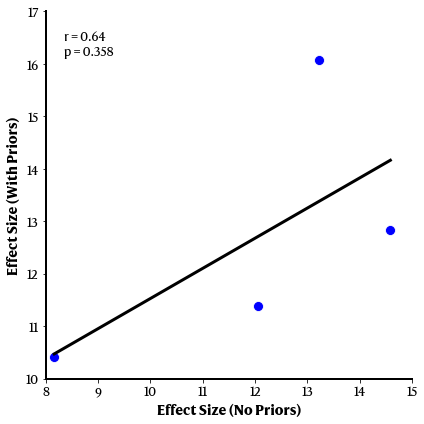

In [300]:
# let's plot a scatter plot of the effect sizes (coefficients) of afd_fixel from both AF_L and AF_R models for both language scores.
# x axis = no priors and y axis = with priors
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

effects_df = pd.DataFrame({
    'no_priors': [results_nopriors['raw_receptive_language'].params['afd_fixel'],
                  results_nopriors['raw_expressive_language'].params['afd_fixel'],
                  results_nopriors_AF_R['raw_receptive_language'].params['afd_fixel'],
                  results_nopriors_AF_R['raw_expressive_language'].params['afd_fixel']],
    'with_priors': [results_withpriors['raw_receptive_language'].params['afd_fixel'],
                    results_withpriors['raw_expressive_language'].params['afd_fixel'],
                    results_withpriors_AF_R['raw_receptive_language'].params['afd_fixel'],
                    results_withpriors_AF_R['raw_expressive_language'].params['afd_fixel']],
    'no_priors_sd': [results_nopriors['raw_receptive_language'].bse['afd_fixel'],
                     results_nopriors['raw_expressive_language'].bse['afd_fixel'],
                     results_nopriors_AF_R['raw_receptive_language'].bse['afd_fixel'],
                     results_nopriors_AF_R['raw_expressive_language'].bse['afd_fixel']],
    'with_priors_sd': [results_withpriors['raw_receptive_language'].bse['afd_fixel'],
                       results_withpriors['raw_expressive_language'].bse['afd_fixel'],
                          results_withpriors_AF_R['raw_receptive_language'].bse['afd_fixel'],
                            results_withpriors_AF_R['raw_expressive_language'].bse['afd_fixel']]
})

sns.scatterplot(data=effects_df, x='no_priors', y='with_priors', s=100, color='blue', ax=ax)
sns.regplot(data=effects_df, x='no_priors', y='with_priors', scatter=False, ax=ax, color='black', line_kws={'linewidth':3},
                ci=None)
# Add error bars
#ax.errorbar(effects_df['no_priors'], effects_df['with_priors'],
#            xerr=effects_df['no_priors_sd'], yerr=effects_df['with_priors_sd'],
#            fmt='o', ecolor='lightgray', elinewidth=3, capsize=5)
ax.set_xlabel("Effect Size (No Priors)", fontsize=14, fontweight='bold')
ax.set_ylabel("Effect Size (With Priors)", fontsize=14, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylim(10, 17)
ax.set_xlim(8, 15)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(2)

# Calculate Pearson correlation
r, p = pearsonr(effects_df['no_priors'], effects_df['with_priors'])
ax.text(0.05, 0.95, f"r = {r:.2f}\np = {p:.3f}", transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()